<a href="https://colab.research.google.com/github/kaya-atakan/Saarland_University/blob/master/TGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt

import numpy as np
import lightgbm as lgb

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 95660 bytes


In [5]:
ramazan = [pd.date_range(start='6/6/2016', end= '7/4/2016'), pd.date_range(start='5/27/2017', end= '6/24/2017'), pd.date_range(start='5/16/2018', end= '6/14/2018'),
               pd.date_range(start='5/6/2019', end='6/3/2019'),pd.date_range(start='4/24/2020', end='5/23/2020')]

# ny = pd.DataFrame({'holiday': "ramazan", 'ds' : ramazan}) 



ramazanBayrami = pd.to_datetime(['7/5/2016','6/25/2017','6/15/2018','6/4/2019','5/24/2020'])

# mlk = pd.DataFrame({'holiday': "ramazanBayrami", 'ds' : ramazanBayrami}) 

kurbanBayrami = pd.to_datetime(['9/12/2016','9/1/2017','8/21/2018','8/11/2019','7/31/2020'])
motherDay = pd.to_datetime(["05/8/2016", "05/14/2017", "05/13/2018", "05/12/2019", "05/10/2020"])
fatherDay = pd.to_datetime(["06/19/2016", "06/18/2017", "06/17/2018", "06/16/2019", "06/21/2020"])
feb14 = pd.to_datetime(["02/14/2016", "02/14/2017", "02/14/2018", "02/14/2019", "02/14/2020"])
may1 = pd.to_datetime(["05/1/2016", "05/1/2017", "05/1/2018", "05/1/2019", "05/1/2020"])
apr23 = pd.to_datetime(["04/23/2016", "04/23/2017", "04/23/2018", "04/23/2019", "04/23/2020"])
aug30 = pd.to_datetime(["08/30/2016", "08/30/2017", "08/30/2018", "08/30/2019",  "08/30/2020"])
jan1 = pd.to_datetime(["01/1/2016", "01/1/2017", "01/1/2018", "01/1/2019", "01/1/2020"])
dec31 = pd.to_datetime(["12/31/2016", "12/31/2017", "12/31/2018", "12/31/2019", "12/31/2020"])
may19 = pd.to_datetime(["05/19/2016", "05/19/2017", "05/19/2018", "05/19/2019", "05/19/2020"])
oct29 = pd.to_datetime(["10/29/2016", "10/29/2017", "10/29/2018", "10/29/2019", "10/29/2020"])
oct28 = pd.to_datetime(["10/28/2016", "10/28/2017", "10/28/2018", "10/28/2019", "10/28/2020"])
tem15 = pd.to_datetime(["07/15/2016", "07/15/2017", "07/15/2018", "07/15/2019", "07/15/2020"])
nevruz = pd.to_datetime(["03/20/2016", "03/20/2017", "03/20/2018", "03/20/2019", "03/20/2020"])
paskalya = pd.to_datetime(["03/27/2016", "03/16/2017", "04/01/2018", "04/21/2019", "04/12/2020"])
black_friday = [pd.date_range(start='11/19/2016', end= '11/27/2016'), 
                pd.date_range(start='11/19/2017', end= '11/27/2017'), 
                pd.date_range(start='11/19/2018', end= '11/27/2018'),
               pd.date_range(start='11/19/2019', end='11/27/2019'),
                pd.date_range(start='11/19/2020', end='11/27/2020')
                ]


In [6]:
ramazan_df = pd.concat([
            pd.DataFrame({'holiday':'ramazan', 'ds': pd.date_range(start='6/6/2016', end= '7/4/2016')}), 
           pd.DataFrame({'holiday':'ramazan', 'ds':pd.date_range(start='5/27/2017', end= '6/24/2017')}),
            pd.DataFrame({'holiday':'ramazan', 'ds':pd.date_range(start='5/16/2018', end= '6/14/2018')}),
            pd.DataFrame({'holiday': 'ramazan', 'ds':pd.date_range(start='5/6/2019', end='6/3/2019')}),
            pd.DataFrame({'holiday':'ramazan', 'ds':pd.date_range(start='4/24/2020', end='5/23/2020')}),
                        ], axis=0).reset_index(drop=True)



ramazanBayrami_df = pd.concat([
            pd.DataFrame({'holiday':'ramazanBayrami', 
                          'ds': pd.to_datetime(['7/5/2016','6/25/2017','6/15/2018','6/4/2019','5/24/2020'])}
                          )
                          ],axis=0).reset_index(drop=True)


motherday_df = pd.concat([
            pd.DataFrame({'holiday':'motherday', 
                          'ds': pd.to_datetime(["05/8/2016", "05/14/2017", "05/13/2018", "05/12/2019", "05/10/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)


fatherday_df = pd.concat([
            pd.DataFrame({'holiday':'fatherday', 
                          'ds': pd.to_datetime(["06/19/2016", "06/18/2017", "06/17/2018", "06/16/2019", "06/21/2020"])}
                        )
                          ],axis=0).reset_index(drop=True)

feb14_df = pd.concat([
            pd.DataFrame({'holiday':'feb14', 
                          'ds': pd.to_datetime(["02/14/2016", "02/14/2017", "02/14/2018", "02/14/2019", "02/14/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)


may1_df = pd.concat([
            pd.DataFrame({'holiday':'may1', 
                          'ds': pd.to_datetime(["05/1/2016", "05/1/2017", "05/1/2018", "05/1/2019", "05/1/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
apr23_df = pd.concat([
            pd.DataFrame({'holiday':'apr23', 
                          'ds': pd.to_datetime(["04/23/2016", "04/23/2017", "04/23/2018", "04/23/2019", "04/23/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)


aug30_df = pd.concat([
            pd.DataFrame({'holiday':'aug30', 
                          'ds': pd.to_datetime(["08/30/2016", "08/30/2017", "08/30/2018", "08/30/2019",  "08/30/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
jan1_df = pd.concat([
            pd.DataFrame({'holiday':'jan1', 
                          'ds': pd.to_datetime(["01/1/2016", "01/1/2017", "01/1/2018", "01/1/2019", "01/1/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
dec31_df = pd.concat([
            pd.DataFrame({'holiday':'dec31', 
                          'ds': pd.to_datetime(["12/31/2016", "12/31/2017", "12/31/2018", "12/31/2019", "12/31/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
may19_df = pd.concat([
            pd.DataFrame({'holiday':'may19', 
                          'ds': pd.to_datetime(["05/19/2016", "05/19/2017", "05/19/2018", "05/19/2019", "05/19/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
oct29_df = pd.concat([
            pd.DataFrame({'holiday':'oct29', 
                          'ds': pd.to_datetime(["10/29/2016", "10/29/2017", "10/29/2018", "10/29/2019", "10/29/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
oct28_df = pd.concat([
            pd.DataFrame({'holiday':'oct28', 
                          'ds': pd.to_datetime(["10/28/2016", "10/28/2017", "10/28/2018", "10/28/2019", "10/28/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
tem15_df = pd.concat([
            pd.DataFrame({'holiday':'tem15', 
                          'ds': pd.to_datetime(["07/15/2016", "07/15/2017", "07/15/2018", "07/15/2019", "07/15/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
nevruz_df = pd.concat([
            pd.DataFrame({'holiday':'nevruz', 
                          'ds': pd.to_datetime(["03/20/2016", "03/20/2017", "03/20/2018", "03/20/2019", "03/20/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)
paskalya_df = pd.concat([
            pd.DataFrame({'holiday':'paskalya', 
                          'ds': pd.to_datetime(["03/27/2016", "03/16/2017", "04/01/2018", "04/21/2019", "04/12/2020"])}
                         )
                          ],axis=0).reset_index(drop=True)





blackFriday_df = pd.concat([
            pd.DataFrame({'holiday':'blackFriday', 'ds': pd.date_range(start='11/19/2016', end= '11/27/2016')}), 
           pd.DataFrame({'holiday':'blackFriday', 'ds':pd.date_range(start='11/19/2017', end= '11/27/2017')}),
            pd.DataFrame({'holiday':'blackFriday', 'ds':pd.date_range(start='11/19/2018', end= '11/27/2018')}),
            pd.DataFrame({'holiday': 'blackFriday', 'ds':pd.date_range(start='11/19/2019', end='11/27/2019')}),
            pd.DataFrame({'holiday':'blackFriday', 'ds':pd.date_range(start='11/19/2020', end='11/27/2020')}),
                        ], axis=0).reset_index(drop=True)



tr_holidays = pd.concat([ramazan_df, ramazanBayrami_df, fatherday_df, motherday_df, 
           tem15_df, apr23_df, may1_df, may19_df, aug30_df, dec31_df,  
           jan1_df, feb14_df, oct28_df, oct29_df, nevruz_df, paskalya_df, blackFriday_df ], axis=0).reset_index(drop=True)



In [ ]:
tr_holidays

,holiday,ds
0,ramazan,2016-06-06
1,ramazan,2016-06-07
2,ramazan,2016-06-08
3,ramazan,2016-06-09
4,ramazan,2016-06-10
...,...,...
262,blackFriday,2020-11-23
263,blackFriday,2020-11-24
264,blackFriday,2020-11-25
265,blackFriday,2020-11-26


In [ ]:
!ls

'data (1).csv'	 data.csv   sample_data


In [7]:
df = pd.read_csv('data.csv')
df.head()

,tarih,satis,magaza
0,2019-10-31,832.783086,t2
1,2019-10-30,88.065182,t2
2,2019-10-29,453.564924,t2
3,2019-10-28,1782.784824,t2
4,2019-10-27,697.274624,t2


In [8]:
df_pivot = df.pivot(index='tarih', columns='magaza', values='satis')
# df_pivot.head()
df_missing = df_pivot[df_pivot.isnull().any(axis=1)]

# PROPHET

In [9]:
prophet_col = ['ds', 'y']
t0_df = df[df.magaza == 't0']
t0_df = t0_df.drop('magaza', axis = 1).reset_index(drop=True)
t0_df.rename(columns={'tarih':'ds', 'satis':'y'}, inplace=True)

t1_df = df[df.magaza == 't1']
t1_df = t1_df.drop('magaza', axis = 1).reset_index(drop=True)
t1_df.rename(columns={'tarih':'ds', 'satis':'y'}, inplace=True)

t2_df = df[df.magaza == 't2']
t2_df = t2_df.drop('magaza', axis = 1).reset_index(drop=True)
t2_df.rename(columns={'tarih':'ds', 'satis':'y'}, inplace = True)

In [10]:
def feature_production(store, sort=True):
  
  
  store['ds'] = pd.to_datetime(store.ds)
  store['month'] = store.ds.dt.month
  store['day'] = store.ds.dt.dayofweek
  store['year'] = store.ds.dt.year
  store['week'] = store.ds.dt.isocalendar().week
  store['holiday'] = store['ds'].isin(tr_holidays['ds']).astype(int) #convert boolean to integer

  store['lag_1'] = store['y'].shift(1)
  store['lag_2'] = store['y'].shift(2)
  store['lag_3'] = store['y'].shift(3)

  store[['lag_1', 'lag_2', 'lag_3']] = store[['lag_1', 'lag_2', 'lag_3']].bfill()

  # Data['Holiday']=Data['pickup_datetime'].dt.date.astype('datetime64[ns]').isin(holidays).astype(int)
  if sort:

    store = store.sort_values(by='ds', ascending=True, ignore_index = True)
    return store

  return store

t0_df = feature_production(t0_df, sort=True)
t1_df = feature_production(t1_df, sort=True)
t2_df = feature_production(t2_df, sort=True)

Backward filling Missing values

In [11]:
t0_df['rolling_mean_w7'] = t0_df['y'].rolling(window=7).mean().fillna(method='bfill')
t0_df['expanding_mean_w7'] = t0_df['y'].expanding(7).mean().fillna(method='bfill')

t1_df['rolling_mean_w7'] = t1_df['y'].rolling(window=7).mean().fillna(method='bfill')
t1_df['expanding_mean_w7'] = t1_df['y'].expanding(7).mean().fillna(method='bfill')

t2_df['rolling_mean_w7'] = t2_df['y'].rolling(window=7).mean().fillna(method='bfill')
t2_df['expanding_mean_w7'] = t2_df['y'].expanding(7).mean().fillna(method='bfill')

In [ ]:
t0_df.head(10)

,ds,y,month,day,year,week,holiday,lag_1,lag_2,lag_3,rolling_mean_w7,expanding_mean_w7
0,2017-01-02,1244.534821,1,0,2017,1,0,1244.534821,1244.534821,1244.534821,1159.085203,1159.085203
1,2017-01-03,1438.443754,1,1,2017,1,0,1244.534821,1244.534821,1244.534821,1159.085203,1159.085203
2,2017-01-04,310.523587,1,2,2017,1,0,1438.443754,1244.534821,1244.534821,1159.085203,1159.085203
3,2017-01-05,1385.161652,1,3,2017,1,0,310.523587,1438.443754,1244.534821,1159.085203,1159.085203
4,2017-01-06,2660.848204,1,4,2017,1,0,1385.161652,310.523587,1438.443754,1159.085203,1159.085203
5,2017-01-07,703.920039,1,5,2017,1,0,2660.848204,1385.161652,310.523587,1159.085203,1159.085203
6,2017-01-08,370.164362,1,6,2017,1,0,703.920039,2660.848204,1385.161652,1159.085203,1159.085203
7,2017-01-09,509.557720,1,0,2017,2,0,370.164362,703.920039,2660.848204,1054.088474,1077.894267
8,2017-01-10,1222.927155,1,1,2017,2,0,509.557720,370.164362,703.920039,1023.300388,1094.009033
9,2017-01-11,733.208480,1,2,2017,2,0,1222.927155,509.557720,370.164362,1083.683945,1057.928977


In [12]:
def prophet_train(store, test=True):
  
  if test:
    X_prophet_train_store_df = store[store['ds'] <= '2019-10-31']
  
  else:
    X_prophet_train_store_df = store[store['ds'] <= '2019-09-30']

  return X_prophet_train_store_df

  

def prophet_val(store, test=True):

  if test:
    print('No ground truth data is available')
  
  if not test:
    X_prophet_val_store_df = store[(store['ds'] > pd.to_datetime('2019-09-30'))]
  
    return X_prophet_val_store_df


In [ ]:
# t0_df[(t0_df['ds'] > pd.to_datetime('2019-09-30'))]
t0_df[t0_df['ds'] > '2019-10-30']

,ds,y,month,day,year,week,holiday,lag_1,lag_2,lag_3,rolling_mean_w7,expanding_mean_w7
0,2019-10-31,1956.464699,10,3,2019,44,0,1956.464699,1956.464699,1956.464699,2345.422917,2345.422917
1,2019-10-30,3195.556172,10,2,2019,44,0,1956.464699,1956.464699,1956.464699,2345.422917,2345.422917
2,2019-10-29,1023.083621,10,1,2019,44,1,3195.556172,1956.464699,1956.464699,2345.422917,2345.422917
3,2019-10-28,3077.941296,10,0,2019,44,1,1023.083621,3195.556172,1956.464699,2345.422917,2345.422917
4,2019-10-27,1637.643793,10,6,2019,43,0,3077.941296,1023.083621,3195.556172,2345.422917,2345.422917
5,2019-10-26,2541.518775,10,5,2019,43,0,1637.643793,3077.941296,1023.083621,2345.422917,2345.422917
6,2019-10-25,2985.752066,10,4,2019,43,0,2541.518775,1637.643793,3077.941296,2345.422917,2345.422917
7,2019-10-24,2743.675884,10,3,2019,43,0,2985.752066,2541.518775,1637.643793,2457.881658,2395.204538
8,2019-10-23,2598.414210,10,2,2019,43,0,2743.675884,2985.752066,2541.518775,2372.575664,2417.783391
9,2019-10-22,2460.107573,10,1,2019,43,0,2598.414210,2743.675884,2985.752066,2577.864800,2422.015809


In [13]:
def prophet_forecast(store, plot= True, valid=True):
  
  prophet = Prophet(holidays=tr_holidays, yearly_seasonality=True)
  # prophet.fit(X_prophet_train_t0_df)
  if valid:
    prophet.fit(prophet_train(store, test=False))
    future_store = prophet.make_future_dataframe(periods=31, freq='D')
    val_forecast_store = prophet.predict(future_store)

    if plot:
      fig = prophet.plot(val_forecast_store)

  else:
    prophet.fit(prophet_train(store, test=True))
    future_store = prophet.make_future_dataframe(periods=31, freq='D')
    val_forecast_store = prophet.predict(future_store)

    if plot:
      fig = prophet.plot(val_forecast_store)


  return val_forecast_store
# a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

Plotting Validation T0 Forecast Values....


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Plotting Validation T1 Forecast Values....


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Plotting Validation T2 Forecast Values....


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,apr23,apr23_lower,apr23_upper,aug30,aug30_lower,aug30_upper,blackFriday,blackFriday_lower,blackFriday_upper,dec31,dec31_lower,dec31_upper,fatherday,fatherday_lower,fatherday_upper,feb14,feb14_lower,feb14_upper,holidays,holidays_lower,holidays_upper,jan1,jan1_lower,jan1_upper,may1,may1_lower,may1_upper,may19,may19_lower,may19_upper,motherday,motherday_lower,motherday_upper,nevruz,nevruz_lower,nevruz_upper,oct28,oct28_lower,oct28_upper,oct29,oct29_lower,oct29_upper,paskalya,paskalya_lower,paskalya_upper,ramazan,ramazan_lower,ramazan_upper,ramazanBayrami,ramazanBayrami_lower,ramazanBayrami_upper,tem15,tem15_lower,tem15_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-02,1685.845972,175.928502,2161.707774,1685.845972,1685.845972,-528.306584,-528.306584,-528.306584,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.775770,146.775770,146.775770,-675.082353,-675.082353,-675.082353,0.0,0.0,0.0,1157.539388
1,2017-01-03,1684.076816,79.842548,2083.904310,1684.076816,1684.076816,-591.049399,-591.049399,-591.049399,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.935012,91.935012,91.935012,-682.984411,-682.984411,-682.984411,0.0,0.0,0.0,1093.027417
2,2017-01-04,1682.307661,117.105141,2035.311208,1682.307661,1682.307661,-660.252044,-660.252044,-660.252044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.897326,29.897326,29.897326,-690.149370,-690.149370,-690.149370,0.0,0.0,0.0,1022.055617
3,2017-01-05,1680.538506,57.305111,1956.748861,1680.538506,1680.538506,-666.666336,-666.666336,-666.666336,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.858452,29.858452,29.858452,-696.524787,-696.524787,-696.524787,0.0,0.0,0.0,1013.872170
4,2017-01-06,1678.769351,105.114859,2103.239945,1678.769351,1678.769351,-601.936705,-601.936705,-601.936705,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.133367,100.133367,100.133367,-702.070072,-702.070072,-702.070072,0.0,0.0,0.0,1076.832646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2019-11-27,1802.729497,132.902709,2186.906785,1800.952711,1804.236315,-661.958975,-661.958975,-661.958975,0.0,0.0,0.0,0.0,0.0,0.0,-23.420237,-23.420237,-23.420237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.420237,-23.420237,-23.420237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.897326,29.897326,29.897326,-668.436064,-668.436064,-668.436064,0.0,0.0,0.0,1140.770522
1019,2019-11-28,1803.049539,199.647889,2177.431685,1801.175289,1804.664957,-632.131164,-632.131164,-632.131164,0.0,0.0,0.0,0.0,0.0,0

<Figure size 432x288 with 0 Axes>

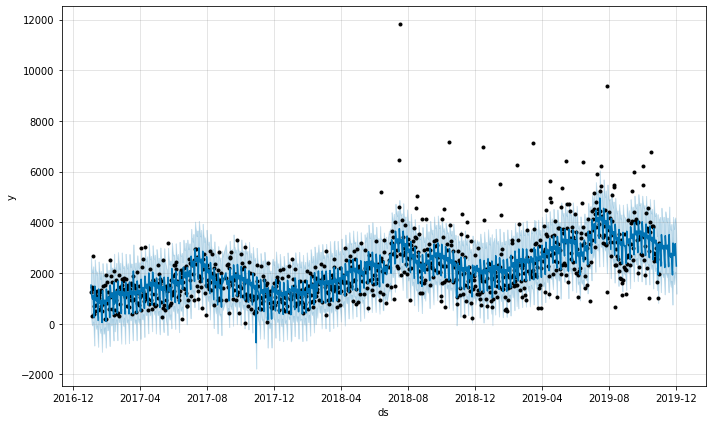

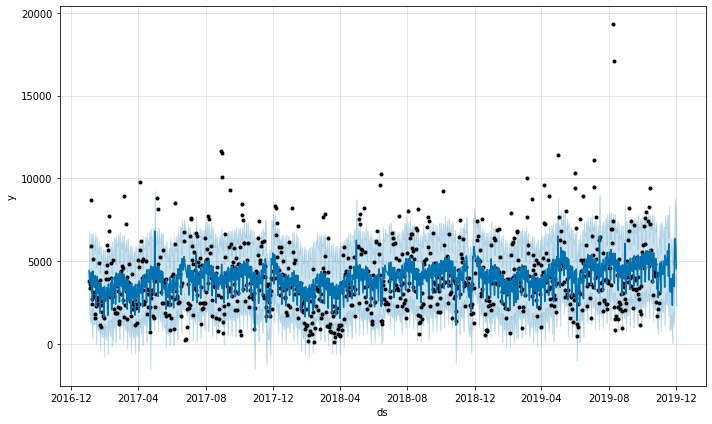

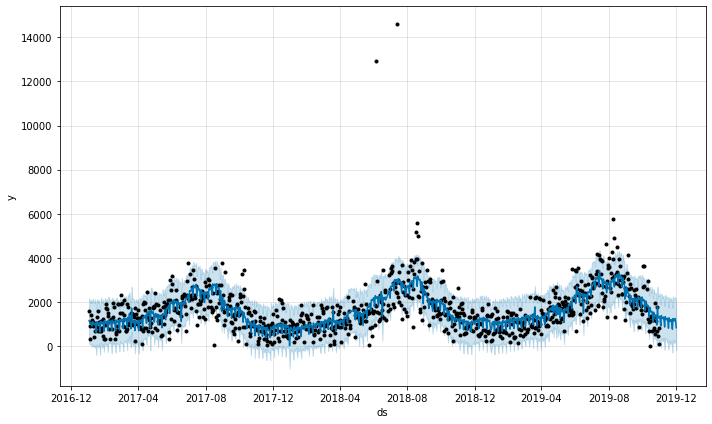

In [15]:
# prophet_forecast(t0_df)

fig = plt.figure()

print('Plotting Validation T0 Forecast Values....')
prophet_forecast(t0_df, plot=True, valid=False)

print('Plotting Validation T1 Forecast Values....')
prophet_forecast(t1_df, plot=True, valid=False)

print('Plotting Validation T2 Forecast Values....')
prophet_forecast(t2_df, plot=True, valid=False)

In [16]:
def get_predicted_yhat(store, test=True):
  if test:
    
    val_forecast_store = prophet_forecast(store, plot=False, valid=False).set_index('ds') 
    val_predicted_store = val_forecast_store['2019-11'] 
    val_predicted_store = val_predicted_store[['yhat_lower', 'yhat_upper', 'yhat']]
  
  else:
    
    val_forecast_store = prophet_forecast(store, plot=False, valid=True).set_index('ds') 
    val_predicted_store = val_forecast_store['2019-10'] 
    val_predicted_store = val_predicted_store[['yhat_lower', 'yhat_upper', 'yhat']]

  return val_predicted_store

# PROPHET VALIDATION DATA

In [19]:
prophet_val(t0_df, test=False)

,ds,y,month,day,year,week,holiday,lag_1,lag_2,lag_3,rolling_mean_w7,expanding_mean_w7
970,2019-10-01,6208.731409,10,1,2019,40,0,5490.273839,3406.125921,2510.143562,3492.656889,2069.979083
971,2019-10-02,5490.273839,10,2,2019,40,0,3406.125921,2510.143562,3059.332475,3956.224561,2073.497905
972,2019-10-03,3406.125921,10,3,2019,40,0,2510.143562,3059.332475,1924.679587,3948.637240,2074.867512
973,2019-10-04,2510.143562,10,4,2019,40,0,3059.332475,1924.679587,4358.618348,3911.636833,2075.314407
974,2019-10-05,3059.332475,10,5,2019,40,0,1924.679587,4358.618348,3793.216645,3836.243524,2076.323657
975,2019-10-06,1924.679587,10,6,2019,40,0,4358.618348,3793.216645,2181.795361,3724.503856,2076.168284
976,2019-10-07,4358.618348,10,0,2019,41,0,3793.216645,2181.795361,3672.137635,3851.129306,2078.504466
977,2019-10-08,3793.216645,10,1,2019,41,0,2181.795361,3672.137635,4584.463471,3506.055768,2080.257750
978,2019-10-09,2181.795361,10,2,2019,41,0,3672.137635,4584.463471,2852.319929,3033.415986,2080.361466
979,2019-10-10,3672.137635,10,3,2019,41,0,4584.463471,2852.319929,999.814771,3071.417659,2081.985727


In [20]:
# X_prophet_val_t0_df
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# fig = px.line(nov_data, x=nov_data.index, y='yhat')
# fig = px.line(X_prophet_val_t0_df, x='ds', y='y')

# sns.lineplot(x=nov_data.index, y='yhat', data=nov_data)
# sns.lineplot(x='ds', y='y', data=X_prophet_val_t0_df)

fig = go.Figure()

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=get_predicted_yhat(t0_df, test=False).index, y=get_predicted_yhat(t0_df, test=False).yhat,
                    mode='lines',
                    name='T0 predicted'), row=1, col = 1)

fig.add_trace(go.Scatter(x=prophet_val(t0_df, test=False).ds, y=prophet_val(t0_df, test=False).y,
                    mode='lines+markers',
                    name='T0 ground truth'), row = 1, col = 1)

##############
fig.add_trace(go.Scatter(x=get_predicted_yhat(t1_df, test=False).index, y=get_predicted_yhat(t1_df, test=False).yhat,
                    mode='lines',
                    name='T1 predicted'), row = 2, col = 1)
fig.add_trace(go.Scatter(x=prophet_val(t1_df, test=False).ds, y=prophet_val(t1_df, test=False).y,
                    mode='lines+markers',
                    name='T1 ground truth'), row = 2, col = 1)

############################
fig.add_trace(go.Scatter(x=get_predicted_yhat(t2_df, test=False).index, y=get_predicted_yhat(t2_df, test=False).yhat,
                    mode='lines',
                    name='T2 predicted'), row = 3, col = 1)
fig.add_trace(go.Scatter(x=prophet_val(t2_df, test=False).ds, y=prophet_val(t2_df, test=False).y,
                    mode='lines+markers',
                    name='T2 ground truth'), row = 3, col = 1)


fig.show()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#PROPHET TEST DATA

In [21]:
# X_prophet_val_t0_df
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# fig = px.line(nov_data, x=nov_data.index, y='yhat')
# fig = px.line(X_prophet_val_t0_df, x='ds', y='y')

# sns.lineplot(x=nov_data.index, y='yhat', data=nov_data)
# sns.lineplot(x='ds', y='y', data=X_prophet_val_t0_df)

fig = go.Figure()

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=get_predicted_yhat(t0_df, test=True).index, y=get_predicted_yhat(t0_df, test=True).yhat,
                    mode='lines',
                    name='T0 test predicted'), row=1, col = 1)


##############
fig.add_trace(go.Scatter(x=get_predicted_yhat(t1_df, test=True).index, y=get_predicted_yhat(t1_df, test=True).yhat,
                    mode='lines',
                    name='T1 test predicted'), row = 2, col = 1)


############################
fig.add_trace(go.Scatter(x=get_predicted_yhat(t2_df, test=True).index, y=get_predicted_yhat(t2_df, test=True).yhat,
                    mode='lines',
                    name='T2 test predicted'), row = 3, col = 1)



fig.show()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
nov_t0_df = get_predicted_yhat(t0_df, test=True).rename(columns={'yhat': 't0_yhat'}).drop(columns=['yhat_lower', 'yhat_upper'], axis=1)
nov_t1_df = get_predicted_yhat(t1_df, test=True).rename(columns={'yhat': 't1_yhat'}).drop(columns=['yhat_lower', 'yhat_upper'], axis=1)
nov_t2_df = get_predicted_yhat(t2_df, test=True).rename(columns={'yhat': 't2_yhat'}).drop(columns=['yhat_lower', 'yhat_upper'], axis=1)

pd.concat([nov_t0_df, nov_t1_df, nov_t2_df], axis=1).to_csv('nov_2019_predictions.csv')
files.download('nov_2019_predictions.csv')


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat nov_2019_predictions.csv

In [ ]:
t0 = df[df.magaza == 't0']
t1 = df[df.magaza == 't1']
t2 = df[df.magaza == 't2']


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace(go.Scatter(x = t0.tarih, y=t0.satis, name='t0'),
              row=3, col=1)

fig.add_trace(go.Scatter(x = t1.tarih, y=t1.satis, name='t1'),
              row=2, col=1)

fig.add_trace(go.Scatter(x = t2.tarih, y=t2.satis, name='t2'),
              row=1, col=1)

fig.update_layout(height=600, width=600,
                  title_text="Stacked Subplots with Shared X-Axes")
fig.show()

In [ ]:
fig = px.line(df, x='tarih', y='satis', color='magaza')

# Show plot 
fig.show()

# LIGHTGBM

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



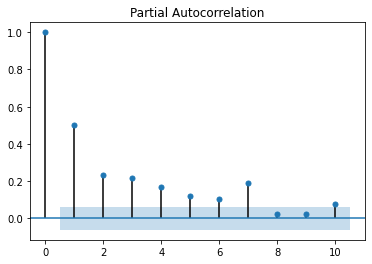

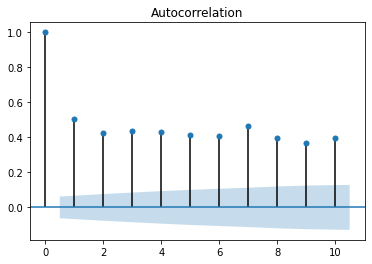

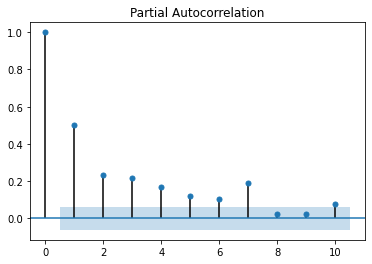

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(t0_df['y'], lags=10)
plot_pacf(t0_df['y'], lags=10)

Partial Autocorrelation shows us that there is a high correlation between lag_1 and curret sales. On the other hand, other lags seem to have a weak effect on the sales.

In [ ]:
t0_df[:10]

,ds,y,month,day,year,holiday,week,rolling_mean_w7,expanding_mean_w7,lag_1,lag_2,lag_3
0,2017-01-02,1244.534821,1,0,2017,0,1,1159.085203,1159.085203,1244.534821,1244.534821,1244.534821
1,2017-01-03,1438.443754,1,1,2017,0,1,1159.085203,1159.085203,1244.534821,1244.534821,1244.534821
2,2017-01-04,310.523587,1,2,2017,0,1,1159.085203,1159.085203,1438.443754,1244.534821,1244.534821
3,2017-01-05,1385.161652,1,3,2017,0,1,1159.085203,1159.085203,310.523587,1438.443754,1244.534821
4,2017-01-06,2660.848204,1,4,2017,0,1,1159.085203,1159.085203,1385.161652,310.523587,1438.443754
5,2017-01-07,703.920039,1,5,2017,0,1,1159.085203,1159.085203,2660.848204,1385.161652,310.523587
6,2017-01-08,370.164362,1,6,2017,0,1,1159.085203,1159.085203,703.920039,2660.848204,1385.161652
7,2017-01-09,509.557720,1,0,2017,0,2,1054.088474,1077.894267,370.164362,703.920039,2660.848204
8,2017-01-10,1222.927155,1,1,2017,0,2,1023.300388,1094.009033,509.557720,370.164362,703.920039
9,2017-01-11,733.208480,1,2,2017,0,2,1083.683945,1057.928977,1222.927155,509.557720,370.164362


Let's draw a heat correlation map

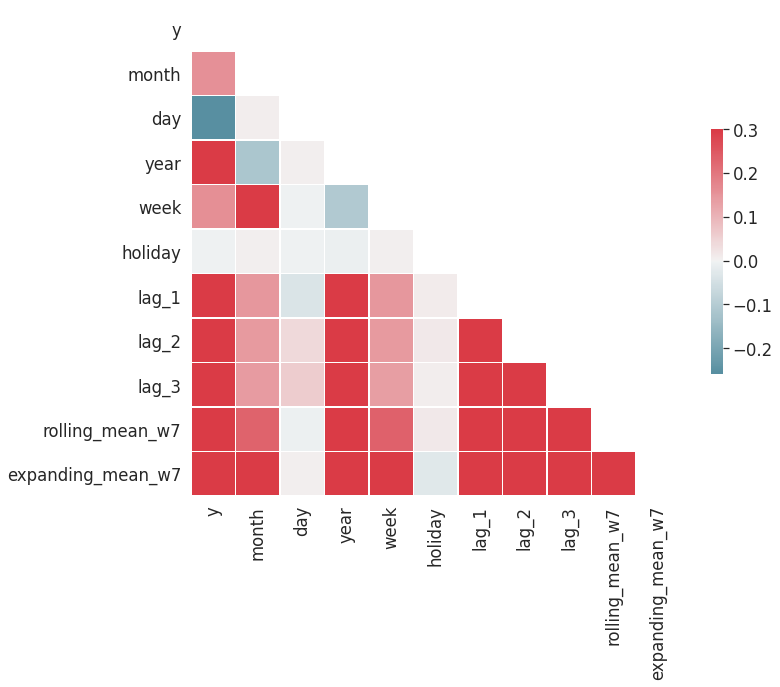

In [ ]:
sns.set(style="white", font_scale=1.5)

# Compute the correlation matrix
corr = t0_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
from sklearn import preprocessing


lbl = preprocessing.LabelEncoder()

t0_df['week'] = lbl.fit_transform(t0_df['week'].astype(int))
t1_df['week'] = lbl.fit_transform(t1_df['week'].astype(int))
t2_df['week'] = lbl.fit_transform(t2_df['week'].astype(int))

n_fold = 3 
folds = TimeSeriesSplit(n_splits=n_fold)

splits = folds.split(X_train_t0_df, y_train_t0_df)


X_train_t0_df = t0_df[t0_df['ds'] <= '2019-10-30'].drop(['ds','y'], axis =1)
y_train_t0_df = t0_df[t0_df['ds'] <= '2019-10-30'].y

X_test_t0_df = t0_df[(t0_df['ds'] > pd.to_datetime('2019-09-30'))].drop(['ds','y'], axis = 1)
y_test_t0_df = t0_df[(t0_df['ds'] > pd.to_datetime('2019-09-30'))].y


# test = test.sort_values('date')

n_fold = 3 
folds = TimeSeriesSplit(n_splits=n_fold)

splits = folds.split(X_train_t0_df, y_train_t0_df)


NameError: ignored

In [257]:

X_train_t1_df = t1_df[t1_df['ds'] <= '2019-09-30'].drop(['ds','y'], axis =1)
y_train_t1_df = t1_df[t1_df['ds'] <= '2019-09-30'].y

X_test_t1_df = t1_df[(t1_df['ds'] > pd.to_datetime('2019-09-30'))].drop(['ds','y'], axis = 1)
y_test_t1_df = t1_df[(t1_df['ds'] > pd.to_datetime('2019-09-30'))].y

In [258]:

X_train_t2_df = t2_df[t2_df['ds'] <= '2019-09-30'].drop(['ds','y'], axis =1)
y_train_t2_df = t2_df[t2_df['ds'] <= '2019-09-30'].y

X_test_t2_df = t2_df[(t2_df['ds'] > pd.to_datetime('2019-09-30'))].drop(['ds','y'], axis = 1)
y_test_t2_df = t2_df[(t2_df['ds'] > pd.to_datetime('2019-09-30'))].y

In [205]:
def light_gbm_train_predictor(store):
  """Include all the independent variables"""
  
  X_lgbm_train_store_df = store[store['ds'] <= '2019-09-30'].drop(['ds','y'], axis =1)

  return X_lgbm_train_store_df

def light_gbm_train_response(store):  
  """Include the dependent variable"""
  y_lgbm_train_store_df = store[store['ds'] <= '2019-09-30'].y

  return y_lgbm_train_store_df

In [206]:
def light_gbm_val_predictor(store, test=True):
  """Include all the independent variables"""
  
  if test:

    X_lgbm_test_store_df = store[store['ds'] <= '2019-10-30'].drop(['ds','y'], axis =1)

    return X_lgbm_test_store_df
    
  else:
    X_lgbm_val_store_df = store[store['ds'] <= '2019-09-30'].drop(['ds','y'], axis =1)

    return X_lgbm_val_store_df
  



def light_gbm_val_response(store, test=True):
  """Include the dependent variable"""
  
  if test:
    print('No ground truth data available')  
  
  else:
  
    y_lgbm_val_store_df = store[store['ds'] <= '2019-09-30'].y

In [249]:
# X_train_t0_df[X_train_t0_df.isnull().any(axis=1)]
# X_train_t0_df.dtypes

,month,day,year,week,holiday,lag_1,lag_2,lag_3,rolling_mean_w7,expanding_mean_w7


In [247]:
light_gbm_train_predictor(t0_df)

,month,day,year,week,holiday,lag_1,lag_2,lag_3,rolling_mean_w7,expanding_mean_w7
0,1,0,2017,0,0,1438.443754,310.523587,1385.161652,1159.085203,1159.085203
1,1,1,2017,0,0,310.523587,1385.161652,2660.848204,1159.085203,1159.085203
2,1,2,2017,0,0,1385.161652,2660.848204,703.920039,1159.085203,1159.085203
3,1,3,2017,0,0,2660.848204,703.920039,370.164362,1159.085203,1159.085203
4,1,4,2017,0,0,703.920039,370.164362,509.557720,1159.085203,1159.085203
...,...,...,...,...,...,...,...,...,...,...
965,9,3,2019,38,0,2769.146414,3587.085632,2706.857265,3195.480651,2061.289471
966,9,4,2019,38,0,3587.085632,2706.857265,3472.240200,3118.068512,2062.021484
967,9,5,2019,38,0,2706.857265,3472.240200,6208.731409,3065.206396,2063.596963
968,9,6,2019,38,0,3472.240200,6208.731409,5490.273839,3164.419114,2064.260803


In [250]:
X_train_t0_df.shape, y_train_t0_df.shape

((970, 10), (970,))

In [277]:
lgb_train_t0 = lgb.Dataset(X_train_t0_df, y_train_t0_df, categorical_feature=['holiday'], free_raw_data=False)
lgb_eval_t0 = lgb.Dataset(X_test_t0_df, y_test_t0_df, reference=lgb_train_t0)

lgb_train_t1 = lgb.Dataset(X_train_t1_df, y_train_t1_df, categorical_feature=['holiday'], free_raw_data=False)
lgb_eval_t1 = lgb.Dataset(X_test_t1_df, y_test_t1_df, reference=lgb_train_t1)

lgb_train_t2 = lgb.Dataset(X_train_t2_df, y_train_t2_df, categorical_feature=['holiday'], free_raw_data=False)
lgb_eval_t2 = lgb.Dataset(X_test_t2_df, y_test_t2_df, reference=lgb_train_t2)

In [204]:
def create_train_dataset(train_predictor, train_response, **kwargs):
  # lgb_train = lgb.Dataset(X_train_t0_df, y_train_t0_df, categorical_feature=['holiday'], free_raw_data=False)
  lgb_train = lgb.Dataset(train_predictor, train_response, categorical_feature=['holiday'], free_raw_data=False)

  return lgb_train
# lgb_eval = lgb.Dataset(X_test_t0_df, y_test_t0_df, reference=lgb_train)


def create_val_dataset(val_predictor, val_response, **kwargs):
  lgb_val = lgb.Dataset(val_predictor, val_response, reference=create_train_dataset(train_predictor, train_response, **kwargs))

  return lgb_val

In [264]:
!pip install --quiet optuna
import optuna
from sklearn.metrics import mean_squared_error
  
    

def objective(trial):

    params = {"objective": "regression",
              "boosting_type": "gbdt",
              "metric": "l2",
              "learning_rate": trial.suggest_uniform('learning_rate', 1e-5, 1.0),
              "num_leaves": trial.suggest_int('num_leaves', 10, 500),
              "feature_fraction": trial.suggest_uniform('feature_fraction', 0.0, 1.0),
              "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.0, 1.0),
              "bagging_freq": trial.suggest_int('bagging_freq', 5, 100),
              "max_depth": trial.suggest_int('max_depth', 5, 20),
              "verbose": 0,
             }
    
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "l2")
    gbm = lgb.train(params, lgb_train_t0, num_boost_round=500,
                    valid_sets=lgb_eval_t0, callbacks=[pruning_callback])
    
    y_pred = gbm.predict(X_test_t0_df, num_iteration=gbm.best_iteration)
    error_test = mean_squared_error(y_test_t0_df, y_pred) ** 0.5
    
    return error_test
  
def objective_t1(trial):

    params = {"objective": "regression",
              "boosting_type": "gbdt",
              "metric": "l2",
              "learning_rate": trial.suggest_uniform('learning_rate', 1e-5, 1.0),
              "num_leaves": trial.suggest_int('num_leaves', 10, 500),
              "feature_fraction": trial.suggest_uniform('feature_fraction', 0.0, 1.0),
              "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.0, 1.0),
              "bagging_freq": trial.suggest_int('bagging_freq', 5, 100),
              "max_depth": trial.suggest_int('max_depth', 5, 20),
              "verbose": 0,
             }
    
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "l2")
    gbm = lgb.train(params, lgb_train_t1, num_boost_round=500,
                    valid_sets=lgb_eval_t1, callbacks=[pruning_callback])
    
    y_pred = gbm.predict(X_test_t1_df, num_iteration=gbm.best_iteration)
    error_test = mean_squared_error(y_test_t1_df, y_pred) ** 0.5
    
    return error_test
  
def objective_t2(trial):

    params = {"objective": "regression",
              "boosting_type": "gbdt",
              "metric": "l2",
              "learning_rate": trial.suggest_uniform('learning_rate', 1e-5, 1.0),
              "num_leaves": trial.suggest_int('num_leaves', 10, 500),
              "feature_fraction": trial.suggest_uniform('feature_fraction', 0.0, 1.0),
              "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.0, 1.0),
              "bagging_freq": trial.suggest_int('bagging_freq', 5, 100),
              "max_depth": trial.suggest_int('max_depth', 5, 20),
              "verbose": 0,
             }
    
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "l2")
    gbm = lgb.train(params, lgb_train_t2, num_boost_round=500,
                    valid_sets=lgb_eval_t2, callbacks=[pruning_callback])
    
    y_pred = gbm.predict(X_test_t2_df, num_iteration=gbm.best_iteration)
    error_test = mean_squared_error(y_test_t2_df, y_pred) ** 0.5
    
    return error_test


study = optuna.create_study()
study.optimize(objective, n_trials=100)
# study.optimize(objective_t1, n_trials=100)
# study.optimize(objective_t2, n_trials=100)

[I 2021-01-21 17:50:57,420] A new study created in memory with name: no-name-2d4c4773-daca-4d33-bdfd-76bcad1dcaa2
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 3.02247e+06
[2]	valid_0's l2: 3.03994e+06
[3]	valid_0's l2: 3.05971e+06
[4]	valid_0's l2: 2.93669e+06
[5]	valid_0's l2: 2.91375e+06
[6]	valid_0's l2: 2.74624e+06
[7]	valid_0's l2: 2.74004e+06
[8]	valid_0's l2: 2.68968e+06
[9]	valid_0's l2: 2.61657e+06
[10]	valid_0's l2: 2.62807e+06
[11]	valid_0's l2: 2.60251e+06
[12]	valid_0's l2: 2.61348e+06
[13]	valid_0's l2: 2.49938e+06
[14]	valid_0's l2: 2.44972e+06
[15]	valid_0's l2: 2.47118e+06
[16]	valid_0's l2: 2.496e+06
[17]	valid_0's l2: 2.47949e+06
[18]	valid_0's l2: 2.4308e+06
[19]	valid_0's l2: 2.36669e+06
[20]	valid_0's l2: 2.29877e+06
[21]	valid_0's l2: 2.29611e+06
[22]	valid_0's l2: 2.20134e+06
[23]	valid_0's l2: 2.1369e+06
[24]	valid_0's l2: 2.09315e+06
[25]	valid_0's l2: 2.05725e+06
[26]	valid_0's l2: 1.99716e+06
[27]	valid_0's l2: 1.96573e+06
[28]	valid_0's l2: 1.95767e+06
[29]	valid_0's l2: 1.93214e+06
[30]	valid_0's l2: 1.92558e+06
[31]	valid_0's l2: 1.92025e+06
[32]	valid_0's l2: 1.90065e+06
[33]	valid_0's l2: 1.

[I 2021-01-21 17:50:58,100] Trial 0 finished with value: 1146.5418436951857 and parameters: {'learning_rate': 0.06242606944799704, 'num_leaves': 348, 'feature_fraction': 0.2060413285914331, 'bagging_fraction': 0.5273099802904391, 'bagging_freq': 6, 'max_depth': 19}. Best is trial 0 with value: 1146.5418436951857.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 2.3568e+06
[2]	valid_0's l2: 2.27646e+06
[3]	valid_0's l2: 2.0229e+06
[4]	valid_0's l2: 1.9247e+06
[5]	valid_0's l2: 2.04581e+06
[6]	valid_0's l2: 1.91376e+06
[7]	valid_0's l2: 1.88666e+06
[8]	valid_0's l2: 1.92904e+06
[9]	valid_0's l2: 1.87367e+06
[10]	valid_0's l2: 1.79909e+06
[11]	valid_0's l2: 1.90452e+06
[12]	valid_0's l2: 1.83942e+06
[13]	valid_0's l2: 1.88034e+06
[14]	valid_0's l2: 1.82355e+06
[15]	valid_0's l2: 1.87229e+06
[16]	valid_0's l2: 1.79542e+06
[17]	valid_0's l2: 1.56515e+06
[18]	valid_0's l2: 1.42754e+06
[19]	valid_0's l2: 1.5301e+06
[20]	valid_0's l2: 1.57946e+06
[21]	valid_0's l2: 1.4775e+06
[22]	valid_0's l2: 1.54415e+06
[23]	valid_0's l2: 1.47994e+06
[24]	valid_0's l2: 1.53784e+06
[25]	valid_0's l2: 1.69119e+06
[26]	valid_0's l2: 1.76528e+06
[27]	valid_0's l2: 1.69252e+06
[28]	valid_0's l2: 1.72476e+06
[29]	valid_0's l2: 1.83471e+06
[30]	valid_0's l2: 1.7921e+06
[31]	valid_0's l2: 1.81938e+06
[32]	valid_0's l2: 1.73342e+06
[33]	valid_0's l2: 1.62

[I 2021-01-21 17:50:58,506] Trial 1 finished with value: 1327.6749118934292 and parameters: {'learning_rate': 0.5996906799456968, 'num_leaves': 288, 'feature_fraction': 0.9107539115265407, 'bagging_fraction': 0.058265697873059574, 'bagging_freq': 8, 'max_depth': 18}. Best is trial 0 with value: 1146.5418436951857.



[284]	valid_0's l2: 1.32794e+06
[285]	valid_0's l2: 1.35649e+06
[286]	valid_0's l2: 1.31793e+06
[287]	valid_0's l2: 1.32438e+06
[288]	valid_0's l2: 1.31227e+06
[289]	valid_0's l2: 1.37853e+06
[290]	valid_0's l2: 1.33568e+06
[291]	valid_0's l2: 1.39567e+06
[292]	valid_0's l2: 1.34439e+06
[293]	valid_0's l2: 1.41422e+06
[294]	valid_0's l2: 1.37141e+06
[295]	valid_0's l2: 1.42991e+06
[296]	valid_0's l2: 1.40835e+06
[297]	valid_0's l2: 1.72424e+06
[298]	valid_0's l2: 1.48509e+06
[299]	valid_0's l2: 1.61636e+06
[300]	valid_0's l2: 1.57919e+06
[301]	valid_0's l2: 1.44616e+06
[302]	valid_0's l2: 1.49884e+06
[303]	valid_0's l2: 1.46145e+06
[304]	valid_0's l2: 1.52094e+06
[305]	valid_0's l2: 1.59703e+06
[306]	valid_0's l2: 1.78577e+06
[307]	valid_0's l2: 1.85379e+06
[308]	valid_0's l2: 1.74013e+06
[309]	valid_0's l2: 1.84198e+06
[310]	valid_0's l2: 1.78256e+06
[311]	valid_0's l2: 1.88773e+06
[312]	valid_0's l2: 1.96086e+06
[313]	valid_0's l2: 1.54521e+06
[314]	valid_0's l2: 1.44776e+06
[315]	v

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[2]	valid_0's l2: 1.4445e+06
[3]	valid_0's l2: 1.47309e+06
[4]	valid_0's l2: 1.43034e+06
[5]	valid_0's l2: 1.32686e+06
[6]	valid_0's l2: 1.24495e+06
[7]	valid_0's l2: 1.30462e+06
[8]	valid_0's l2: 1.35422e+06
[9]	valid_0's l2: 1.36065e+06
[10]	valid_0's l2: 1.43131e+06
[11]	valid_0's l2: 1.44225e+06
[12]	valid_0's l2: 1.42353e+06
[13]	valid_0's l2: 1.4293e+06
[14]	valid_0's l2: 1.32393e+06
[15]	valid_0's l2: 1.31493e+06
[16]	valid_0's l2: 1.34614e+06
[17]	valid_0's l2: 1.2962e+06
[18]	valid_0's l2: 1.31416e+06
[19]	valid_0's l2: 1.31365e+06
[20]	valid_0's l2: 1.30496e+06
[21]	valid_0's l2: 1.29718e+06
[22]	valid_0's l2: 1.3339e+06
[23]	valid_0's l2: 1.35801e+06
[24]	valid_0's l2: 1.33808e+06
[25]	valid_0's l2: 1.3188e+06
[26]	valid_0's l2: 1.32669e+06
[27]	valid_0's l2: 1.29268e+06
[28]	valid_0's l2: 1.313e+06
[29]	valid_0's l2: 1.38454e+06
[30]	valid_0's l2: 1.3935e+06
[31]	valid_0's l2: 1.41385e+06
[32]	valid_0's l2: 1.41437e+06
[33]	valid_0's l2: 1.42228e+06
[34]	valid_0's l2: 1.445

[I 2021-01-21 17:50:59,536] Trial 2 finished with value: 1120.7761114696373 and parameters: {'learning_rate': 0.5028318632570372, 'num_leaves': 123, 'feature_fraction': 0.8949180042316012, 'bagging_fraction': 0.8174328233985251, 'bagging_freq': 49, 'max_depth': 20}. Best is trial 2 with value: 1120.7761114696373.


[463]	valid_0's l2: 1.25069e+06
[464]	valid_0's l2: 1.25074e+06
[465]	valid_0's l2: 1.2498e+06
[466]	valid_0's l2: 1.25187e+06
[467]	valid_0's l2: 1.25387e+06
[468]	valid_0's l2: 1.2548e+06
[469]	valid_0's l2: 1.25661e+06
[470]	valid_0's l2: 1.25691e+06
[471]	valid_0's l2: 1.25668e+06
[472]	valid_0's l2: 1.25668e+06
[473]	valid_0's l2: 1.25617e+06
[474]	valid_0's l2: 1.25612e+06
[475]	valid_0's l2: 1.25594e+06
[476]	valid_0's l2: 1.25633e+06
[477]	valid_0's l2: 1.25637e+06
[478]	valid_0's l2: 1.25592e+06
[479]	valid_0's l2: 1.25536e+06
[480]	valid_0's l2: 1.25465e+06
[481]	valid_0's l2: 1.25396e+06
[482]	valid_0's l2: 1.25425e+06
[483]	valid_0's l2: 1.25538e+06
[484]	valid_0's l2: 1.2546e+06
[485]	valid_0's l2: 1.25503e+06
[486]	valid_0's l2: 1.25609e+06
[487]	valid_0's l2: 1.25581e+06
[488]	valid_0's l2: 1.25612e+06
[489]	valid_0's l2: 1.25577e+06
[490]	valid_0's l2: 1.25527e+06
[491]	valid_0's l2: 1.25587e+06
[492]	valid_0's l2: 1.2561e+06
[493]	valid_0's l2: 1.2558e+06
[494]	valid_0

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.




[8]	valid_0's l2: 2.13012e+06
[9]	valid_0's l2: 1.82472e+06
[10]	valid_0's l2: 1.83835e+06
[11]	valid_0's l2: 2.16861e+06
[12]	valid_0's l2: 1.95313e+06
[13]	valid_0's l2: 1.99365e+06
[14]	valid_0's l2: 2.04797e+06
[15]	valid_0's l2: 1.86831e+06
[16]	valid_0's l2: 1.8482e+06
[17]	valid_0's l2: 1.84573e+06
[18]	valid_0's l2: 1.77861e+06
[19]	valid_0's l2: 1.69995e+06
[20]	valid_0's l2: 1.70151e+06
[21]	valid_0's l2: 1.77633e+06
[22]	valid_0's l2: 1.76515e+06
[23]	valid_0's l2: 1.72512e+06
[24]	valid_0's l2: 1.72518e+06
[25]	valid_0's l2: 1.71613e+06
[26]	valid_0's l2: 1.69458e+06
[27]	valid_0's l2: 1.65075e+06
[28]	valid_0's l2: 1.69218e+06
[29]	valid_0's l2: 1.65555e+06
[30]	valid_0's l2: 1.68883e+06
[31]	valid_0's l2: 1.67654e+06
[32]	valid_0's l2: 1.67838e+06
[33]	valid_0's l2: 1.6819e+06
[34]	valid_0's l2: 1.70807e+06
[35]	valid_0's l2: 1.66936e+06
[36]	valid_0's l2: 1.63823e+06
[37]	valid_0's l2: 1.63069e+06
[38]	valid_0's l2: 1.62901e+06
[39]	valid_0's l2: 1.72959e+06
[40]	valid_

[I 2021-01-21 17:51:00,136] Trial 3 finished with value: 1235.5912068945688 and parameters: {'learning_rate': 0.9922143780559322, 'num_leaves': 310, 'feature_fraction': 0.029039284267296295, 'bagging_fraction': 0.5286638849160393, 'bagging_freq': 84, 'max_depth': 14}. Best is trial 2 with value: 1120.7761114696373.



[394]	valid_0's l2: 1.66269e+06
[395]	valid_0's l2: 1.65875e+06
[396]	valid_0's l2: 1.65733e+06
[397]	valid_0's l2: 1.6323e+06
[398]	valid_0's l2: 1.634e+06
[399]	valid_0's l2: 1.64096e+06
[400]	valid_0's l2: 1.62436e+06
[401]	valid_0's l2: 1.62551e+06
[402]	valid_0's l2: 1.62064e+06
[403]	valid_0's l2: 1.6146e+06
[404]	valid_0's l2: 1.61724e+06
[405]	valid_0's l2: 1.62327e+06
[406]	valid_0's l2: 1.60687e+06
[407]	valid_0's l2: 1.60381e+06
[408]	valid_0's l2: 1.6039e+06
[409]	valid_0's l2: 1.59398e+06
[410]	valid_0's l2: 1.59166e+06
[411]	valid_0's l2: 1.59831e+06
[412]	valid_0's l2: 1.59976e+06
[413]	valid_0's l2: 1.62577e+06
[414]	valid_0's l2: 1.62421e+06
[415]	valid_0's l2: 1.62879e+06
[416]	valid_0's l2: 1.62785e+06
[417]	valid_0's l2: 1.63957e+06
[418]	valid_0's l2: 1.64452e+06
[419]	valid_0's l2: 1.64537e+06
[420]	valid_0's l2: 1.64349e+06
[421]	valid_0's l2: 1.58497e+06
[422]	valid_0's l2: 1.5732e+06
[423]	valid_0's l2: 1.56277e+06
[424]	valid_0's l2: 1.57245e+06
[425]	valid_0

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.




[29]	valid_0's l2: 1.67017e+06
[30]	valid_0's l2: 1.65704e+06
[31]	valid_0's l2: 1.65658e+06
[32]	valid_0's l2: 1.66501e+06
[33]	valid_0's l2: 1.61579e+06
[34]	valid_0's l2: 1.60972e+06
[35]	valid_0's l2: 1.59054e+06
[36]	valid_0's l2: 1.58701e+06
[37]	valid_0's l2: 1.62593e+06
[38]	valid_0's l2: 1.58431e+06
[39]	valid_0's l2: 1.5809e+06
[40]	valid_0's l2: 1.60301e+06
[41]	valid_0's l2: 1.56853e+06
[42]	valid_0's l2: 1.55678e+06
[43]	valid_0's l2: 1.55166e+06
[44]	valid_0's l2: 1.58048e+06
[45]	valid_0's l2: 1.54837e+06
[46]	valid_0's l2: 1.54632e+06
[47]	valid_0's l2: 1.53966e+06
[48]	valid_0's l2: 1.51302e+06
[49]	valid_0's l2: 1.49179e+06
[50]	valid_0's l2: 1.49433e+06
[51]	valid_0's l2: 1.47177e+06
[52]	valid_0's l2: 1.50672e+06
[53]	valid_0's l2: 1.52104e+06
[54]	valid_0's l2: 1.53683e+06
[55]	valid_0's l2: 1.60866e+06
[56]	valid_0's l2: 1.63399e+06
[57]	valid_0's l2: 1.61766e+06
[58]	valid_0's l2: 1.65175e+06
[59]	valid_0's l2: 1.65265e+06
[60]	valid_0's l2: 1.65585e+06
[61]	val

[I 2021-01-21 17:51:00,642] Trial 4 finished with value: 1066.2266859220144 and parameters: {'learning_rate': 0.5328629198901396, 'num_leaves': 275, 'feature_fraction': 0.33382657323655307, 'bagging_fraction': 0.18062259073460163, 'bagging_freq': 89, 'max_depth': 12}. Best is trial 4 with value: 1066.2266859220144.



[477]	valid_0's l2: 1.19872e+06
[478]	valid_0's l2: 1.20952e+06
[479]	valid_0's l2: 1.17544e+06
[480]	valid_0's l2: 1.17101e+06
[481]	valid_0's l2: 1.16093e+06
[482]	valid_0's l2: 1.1834e+06
[483]	valid_0's l2: 1.17312e+06
[484]	valid_0's l2: 1.15495e+06
[485]	valid_0's l2: 1.145e+06
[486]	valid_0's l2: 1.12856e+06
[487]	valid_0's l2: 1.13329e+06
[488]	valid_0's l2: 1.1264e+06
[489]	valid_0's l2: 1.11834e+06
[490]	valid_0's l2: 1.10919e+06
[491]	valid_0's l2: 1.10735e+06
[492]	valid_0's l2: 1.1096e+06
[493]	valid_0's l2: 1.11851e+06
[494]	valid_0's l2: 1.14e+06
[495]	valid_0's l2: 1.13766e+06
[496]	valid_0's l2: 1.13464e+06
[497]	valid_0's l2: 1.14886e+06
[498]	valid_0's l2: 1.15166e+06
[499]	valid_0's l2: 1.14112e+06
[500]	valid_0's l2: 1.13684e+06
[1]	valid_0's l2: 1.37481e+06
[2]	valid_0's l2: 1.41385e+06
[3]	valid_0's l2: 1.54916e+06
[4]	valid_0's l2: 1.59314e+06
[5]	valid_0's l2: 1.54035e+06
[6]	valid_0's l2: 1.5315e+06
[7]	valid_0's l2: 1.56861e+06
[8]	valid_0's l2: 1.66283e+06


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:00,791] Trial 5 pruned. Trial was pruned at iteration 92.
[I 2021-01-21 17:51:00,810] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:00,821] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:00,836] Trial 8 pruned. Trial was pruned at iteration 3.
[I 2021-01-21 17:51:00,845] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:00,881] Trial 10 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 2.19786e+06
[2]	valid_0's l2: 2.43332e+06
[3]	valid_0's l2: 2.44073e+06
[1]	valid_0's l2: 2.20148e+06
[2]	valid_0's l2: 1.67327e+06
[3]	valid_0's l2: 1.58067e+06
[4]	valid_0's l2: 1.4253e+06
[5]	valid_0's l2: 1.32071e+06
[6]	valid_0's l2: 1.31302e+06
[7]	valid_0's l2: 1.29779e+06
[8]	valid_0's l2: 1.22977e+06
[9]	valid_0's l2: 1.20982e+06
[10]	valid_0's l2: 1.23952e+06
[11]	valid_0's l2: 1.22179e+06
[12]	valid_0's l2: 1.21969e+06
[13]	valid_0's l2: 1.25818e+06
[14]	valid_0's l2: 1.26259e+06
[15]	valid_0's l2: 1.23849e+06
[16]	valid_0's l2: 1.24463e+06
[17]	valid_0's l2: 1.23237e+06
[18]	valid_0's l2: 1.24856e+06
[19]	valid_0's l2: 1.26372e+06
[20]	valid_0's l2: 1.28642e+06
[21]	valid_0's l2: 1.29863e+06
[22]	valid_0's l2: 1.27135e+06
[23]	valid_0's l2: 1.27939e+06
[24]	valid_0's l2: 1.28095e+06
[25]	valid_0's l2: 1.26482e+06
[26]	valid_0's l2: 1.27622e+06
[27]	valid_0's l2: 1.26521e+06
[28]	valid_0's l2: 1.26047e+06
[29]	valid_0's l2: 1.28188e+06
[30]	valid_0's l2: 1.

[I 2021-01-21 17:51:01,913] Trial 11 finished with value: 1191.3936296788097 and parameters: {'learning_rate': 0.3341149842169784, 'num_leaves': 142, 'feature_fraction': 0.6751837443415024, 'bagging_fraction': 0.9666358578597756, 'bagging_freq': 37, 'max_depth': 10}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:01,934] Trial 12 pruned. Trial was pruned at iteration 0.


[499]	valid_0's l2: 1.4194e+06
[500]	valid_0's l2: 1.41942e+06
[1]	valid_0's l2: 2.26733e+06
[2]	valid_0's l2: 1.85733e+06
[3]	valid_0's l2: 1.54523e+06
[4]	valid_0's l2: 1.4077e+06
[5]	valid_0's l2: 1.31006e+06
[6]	valid_0's l2: 1.32386e+06
[7]	valid_0's l2: 1.28093e+06
[8]	valid_0's l2: 1.29407e+06
[9]	valid_0's l2: 1.26553e+06
[10]	valid_0's l2: 1.267e+06
[11]	valid_0's l2: 1.26638e+06
[12]	valid_0's l2: 1.23404e+06
[13]	valid_0's l2: 1.22583e+06
[14]	valid_0's l2: 1.26387e+06
[15]	valid_0's l2: 1.24838e+06
[16]	valid_0's l2: 1.32282e+06
[17]	valid_0's l2: 1.32109e+06
[18]	valid_0's l2: 1.36838e+06
[19]	valid_0's l2: 1.38245e+06
[20]	valid_0's l2: 1.42319e+06
[21]	valid_0's l2: 1.43299e+06
[22]	valid_0's l2: 1.43706e+06
[23]	valid_0's l2: 1.51207e+06
[24]	valid_0's l2: 1.52558e+06
[25]	valid_0's l2: 1.5337e+06
[26]	valid_0's l2: 1.58481e+06
[27]	valid_0's l2: 1.60883e+06
[28]	valid_0's l2: 1.61228e+06
[29]	valid_0's l2: 1.59317e+06
[30]	valid_0's l2: 1.59e+06
[31]	valid_0's l2: 1.61

[I 2021-01-21 17:51:02,796] Trial 13 finished with value: 1143.1722821845249 and parameters: {'learning_rate': 0.2551056828089509, 'num_leaves': 54, 'feature_fraction': 0.957143718415218, 'bagging_fraction': 0.24793466511590978, 'bagging_freq': 45, 'max_depth': 15}. Best is trial 4 with value: 1066.2266859220144.


[451]	valid_0's l2: 1.46272e+06
[452]	valid_0's l2: 1.44272e+06
[453]	valid_0's l2: 1.42739e+06
[454]	valid_0's l2: 1.41284e+06
[455]	valid_0's l2: 1.42831e+06
[456]	valid_0's l2: 1.41142e+06
[457]	valid_0's l2: 1.37964e+06
[458]	valid_0's l2: 1.38556e+06
[459]	valid_0's l2: 1.37207e+06
[460]	valid_0's l2: 1.355e+06
[461]	valid_0's l2: 1.35092e+06
[462]	valid_0's l2: 1.37965e+06
[463]	valid_0's l2: 1.36773e+06
[464]	valid_0's l2: 1.36608e+06
[465]	valid_0's l2: 1.37974e+06
[466]	valid_0's l2: 1.37373e+06
[467]	valid_0's l2: 1.36954e+06
[468]	valid_0's l2: 1.34641e+06
[469]	valid_0's l2: 1.34755e+06
[470]	valid_0's l2: 1.35758e+06
[471]	valid_0's l2: 1.36102e+06
[472]	valid_0's l2: 1.34889e+06
[473]	valid_0's l2: 1.34319e+06
[474]	valid_0's l2: 1.33217e+06
[475]	valid_0's l2: 1.34916e+06
[476]	valid_0's l2: 1.34747e+06
[477]	valid_0's l2: 1.3505e+06
[478]	valid_0's l2: 1.34768e+06
[479]	valid_0's l2: 1.34561e+06
[480]	valid_0's l2: 1.35287e+06
[481]	valid_0's l2: 1.36529e+06
[482]	valid

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.




[46]	valid_0's l2: 1.10777e+06
[47]	valid_0's l2: 1.09064e+06
[48]	valid_0's l2: 1.12109e+06
[49]	valid_0's l2: 1.12567e+06
[50]	valid_0's l2: 1.13141e+06
[51]	valid_0's l2: 1.13474e+06
[52]	valid_0's l2: 1.1134e+06
[53]	valid_0's l2: 1.12055e+06
[54]	valid_0's l2: 1.11117e+06
[55]	valid_0's l2: 1.10289e+06
[56]	valid_0's l2: 1.10046e+06
[57]	valid_0's l2: 1.0991e+06
[58]	valid_0's l2: 1.09026e+06
[59]	valid_0's l2: 1.08493e+06
[60]	valid_0's l2: 1.07593e+06
[61]	valid_0's l2: 1.06801e+06
[62]	valid_0's l2: 1.08865e+06
[63]	valid_0's l2: 1.1057e+06
[64]	valid_0's l2: 1.09963e+06
[65]	valid_0's l2: 1.07688e+06
[66]	valid_0's l2: 1.07686e+06
[67]	valid_0's l2: 1.08206e+06
[68]	valid_0's l2: 1.08171e+06
[69]	valid_0's l2: 1.08789e+06
[70]	valid_0's l2: 1.1037e+06
[71]	valid_0's l2: 1.11441e+06
[72]	valid_0's l2: 1.12208e+06
[73]	valid_0's l2: 1.13657e+06
[74]	valid_0's l2: 1.12782e+06
[75]	valid_0's l2: 1.11793e+06
[76]	valid_0's l2: 1.11952e+06
[77]	valid_0's l2: 1.1089e+06
[78]	valid_0

[I 2021-01-21 17:51:03,903] Trial 14 finished with value: 1078.372165484932 and parameters: {'learning_rate': 0.7144748812216799, 'num_leaves': 205, 'feature_fraction': 0.6393144206613517, 'bagging_fraction': 0.8023479606414832, 'bagging_freq': 93, 'max_depth': 9}. Best is trial 4 with value: 1066.2266859220144.


[449]	valid_0's l2: 1.09896e+06
[450]	valid_0's l2: 1.09877e+06
[451]	valid_0's l2: 1.09916e+06
[452]	valid_0's l2: 1.09904e+06
[453]	valid_0's l2: 1.09915e+06
[454]	valid_0's l2: 1.09908e+06
[455]	valid_0's l2: 1.09911e+06
[456]	valid_0's l2: 1.09937e+06
[457]	valid_0's l2: 1.09945e+06
[458]	valid_0's l2: 1.09949e+06
[459]	valid_0's l2: 1.09975e+06
[460]	valid_0's l2: 1.09981e+06
[461]	valid_0's l2: 1.09972e+06
[462]	valid_0's l2: 1.09974e+06
[463]	valid_0's l2: 1.09998e+06
[464]	valid_0's l2: 1.09971e+06
[465]	valid_0's l2: 1.09989e+06
[466]	valid_0's l2: 1.09916e+06
[467]	valid_0's l2: 1.08954e+06
[468]	valid_0's l2: 1.11775e+06
[469]	valid_0's l2: 1.12254e+06
[470]	valid_0's l2: 1.12461e+06
[471]	valid_0's l2: 1.1126e+06
[472]	valid_0's l2: 1.1097e+06
[473]	valid_0's l2: 1.11755e+06
[474]	valid_0's l2: 1.11205e+06
[475]	valid_0's l2: 1.12117e+06
[476]	valid_0's l2: 1.12261e+06
[477]	valid_0's l2: 1.13494e+06
[478]	valid_0's l2: 1.13281e+06
[479]	valid_0's l2: 1.13046e+06
[480]	vali

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[3]	valid_0's l2: 1.85884e+06
[4]	valid_0's l2: 1.50815e+06
[5]	valid_0's l2: 1.67343e+06
[6]	valid_0's l2: 1.82929e+06
[7]	valid_0's l2: 1.90401e+06
[8]	valid_0's l2: 1.8243e+06
[9]	valid_0's l2: 1.74034e+06
[10]	valid_0's l2: 1.72312e+06
[11]	valid_0's l2: 1.73742e+06
[12]	valid_0's l2: 1.96855e+06
[13]	valid_0's l2: 1.96337e+06
[14]	valid_0's l2: 1.9821e+06
[15]	valid_0's l2: 1.99933e+06
[16]	valid_0's l2: 1.93652e+06
[17]	valid_0's l2: 1.95176e+06
[18]	valid_0's l2: 2.01264e+06
[19]	valid_0's l2: 2.07256e+06
[20]	valid_0's l2: 2.02659e+06
[21]	valid_0's l2: 2.12765e+06
[22]	valid_0's l2: 2.05417e+06
[23]	valid_0's l2: 2.15642e+06
[24]	valid_0's l2: 2.19437e+06
[25]	valid_0's l2: 2.16494e+06
[26]	valid_0's l2: 2.19421e+06
[27]	valid_0's l2: 2.2781e+06
[28]	valid_0's l2: 2.28457e+06
[29]	valid_0's l2: 2.34256e+06
[30]	valid_0's l2: 2.36569e+06
[31]	valid_0's l2: 2.44644e+06
[32]	valid_0's l2: 2.30507e+06
[33]	valid_0's l2: 2.26656e+06
[34]	valid_0's l2: 2.2931e+06
[35]	valid_0's l2: 

[I 2021-01-21 17:51:04,177] Trial 15 pruned. Trial was pruned at iteration 181.
[I 2021-01-21 17:51:04,193] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:04,221] Trial 17 pruned. Trial was pruned at iteration 0.



[146]	valid_0's l2: 3.11757e+06
[147]	valid_0's l2: 3.07639e+06
[148]	valid_0's l2: 3.10785e+06
[149]	valid_0's l2: 3.07963e+06
[150]	valid_0's l2: 3.15064e+06
[151]	valid_0's l2: 3.18038e+06
[152]	valid_0's l2: 3.17083e+06
[153]	valid_0's l2: 3.21022e+06
[154]	valid_0's l2: 3.19804e+06
[155]	valid_0's l2: 3.16047e+06
[156]	valid_0's l2: 3.15456e+06
[157]	valid_0's l2: 3.11159e+06
[158]	valid_0's l2: 3.11079e+06
[159]	valid_0's l2: 3.12608e+06
[160]	valid_0's l2: 3.17189e+06
[161]	valid_0's l2: 3.1834e+06
[162]	valid_0's l2: 3.15588e+06
[163]	valid_0's l2: 3.14848e+06
[164]	valid_0's l2: 3.14646e+06
[165]	valid_0's l2: 3.19644e+06
[166]	valid_0's l2: 3.21578e+06
[167]	valid_0's l2: 3.21757e+06
[168]	valid_0's l2: 3.27368e+06
[169]	valid_0's l2: 3.28044e+06
[170]	valid_0's l2: 3.26415e+06
[171]	valid_0's l2: 3.22884e+06
[172]	valid_0's l2: 3.24633e+06
[173]	valid_0's l2: 3.27703e+06
[174]	valid_0's l2: 3.26359e+06
[175]	valid_0's l2: 3.30061e+06
[176]	valid_0's l2: 3.29417e+06
[177]	va

[I 2021-01-21 17:51:04,421] Trial 18 pruned. Trial was pruned at iteration 153.


[76]	valid_0's l2: 1.82827e+06
[77]	valid_0's l2: 1.72324e+06
[78]	valid_0's l2: 1.72631e+06
[79]	valid_0's l2: 1.69548e+06
[80]	valid_0's l2: 1.7462e+06
[81]	valid_0's l2: 1.79733e+06
[82]	valid_0's l2: 1.79291e+06
[83]	valid_0's l2: 1.81322e+06
[84]	valid_0's l2: 1.82508e+06
[85]	valid_0's l2: 1.83789e+06
[86]	valid_0's l2: 1.84186e+06
[87]	valid_0's l2: 1.81146e+06
[88]	valid_0's l2: 1.79697e+06
[89]	valid_0's l2: 1.77904e+06
[90]	valid_0's l2: 1.79965e+06
[91]	valid_0's l2: 1.85288e+06
[92]	valid_0's l2: 1.86961e+06
[93]	valid_0's l2: 1.88271e+06
[94]	valid_0's l2: 1.87613e+06
[95]	valid_0's l2: 1.84442e+06
[96]	valid_0's l2: 1.82068e+06
[97]	valid_0's l2: 1.86986e+06
[98]	valid_0's l2: 1.89388e+06
[99]	valid_0's l2: 1.90066e+06
[100]	valid_0's l2: 1.84804e+06
[101]	valid_0's l2: 1.83818e+06
[102]	valid_0's l2: 1.80919e+06
[103]	valid_0's l2: 1.80141e+06
[104]	valid_0's l2: 1.80186e+06
[105]	valid_0's l2: 1.7658e+06
[106]	valid_0's l2: 1.81067e+06
[107]	valid_0's l2: 1.78939e+06
[1

[I 2021-01-21 17:51:05,431] Trial 19 finished with value: 1117.848252160638 and parameters: {'learning_rate': 0.6255955214749173, 'num_leaves': 213, 'feature_fraction': 0.8109385911578696, 'bagging_fraction': 0.6506691713171036, 'bagging_freq': 100, 'max_depth': 11}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:05,461] Trial 20 pruned. Trial was pruned at iteration 3.
[I 2021-01-21 17:51:05,486] Trial 21 pruned. Trial was pruned at iteration 3.



[483]	valid_0's l2: 1.25332e+06
[484]	valid_0's l2: 1.25089e+06
[485]	valid_0's l2: 1.25184e+06
[486]	valid_0's l2: 1.24962e+06
[487]	valid_0's l2: 1.24938e+06
[488]	valid_0's l2: 1.24909e+06
[489]	valid_0's l2: 1.24926e+06
[490]	valid_0's l2: 1.24963e+06
[491]	valid_0's l2: 1.2514e+06
[492]	valid_0's l2: 1.25107e+06
[493]	valid_0's l2: 1.2509e+06
[494]	valid_0's l2: 1.25037e+06
[495]	valid_0's l2: 1.24922e+06
[496]	valid_0's l2: 1.24982e+06
[497]	valid_0's l2: 1.25004e+06
[498]	valid_0's l2: 1.24863e+06
[499]	valid_0's l2: 1.24793e+06
[500]	valid_0's l2: 1.24958e+06
[1]	valid_0's l2: 1.5712e+06
[2]	valid_0's l2: 1.47383e+06
[3]	valid_0's l2: 1.67194e+06
[1]	valid_0's l2: 1.57693e+06
[2]	valid_0's l2: 1.44883e+06
[3]	valid_0's l2: 1.46815e+06
[1]	valid_0's l2: 1.71301e+06
[2]	valid_0's l2: 1.28754e+06
[3]	valid_0's l2: 1.39354e+06
[4]	valid_0's l2: 1.28929e+06
[5]	valid_0's l2: 1.18055e+06
[6]	valid_0's l2: 1.21189e+06
[7]	valid_0's l2: 1.16448e+06
[8]	valid_0's l2: 1.11957e+06
[9]	va

[I 2021-01-21 17:51:06,600] Trial 22 finished with value: 1151.0337517190283 and parameters: {'learning_rate': 0.5750767755923443, 'num_leaves': 188, 'feature_fraction': 0.8274083407702271, 'bagging_fraction': 0.8711724509938601, 'bagging_freq': 74, 'max_depth': 9}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 1.97999e+06
[2]	valid_0's l2: 1.53196e+06
[3]	valid_0's l2: 1.42485e+06
[4]	valid_0's l2: 1.35549e+06
[5]	valid_0's l2: 1.22214e+06
[6]	valid_0's l2: 1.18089e+06
[7]	valid_0's l2: 1.17289e+06
[8]	valid_0's l2: 1.16167e+06
[9]	valid_0's l2: 1.15209e+06
[10]	valid_0's l2: 1.21839e+06
[11]	valid_0's l2: 1.27089e+06
[12]	valid_0's l2: 1.27526e+06
[13]	valid_0's l2: 1.21316e+06
[14]	valid_0's l2: 1.14374e+06
[15]	valid_0's l2: 1.13176e+06
[16]	valid_0's l2: 1.13937e+06
[17]	valid_0's l2: 1.11038e+06
[18]	valid_0's l2: 1.16902e+06
[19]	valid_0's l2: 1.17723e+06
[20]	valid_0's l2: 1.15107e+06
[21]	valid_0's l2: 1.10909e+06
[22]	valid_0's l2: 1.11959e+06
[23]	valid_0's l2: 1.11491e+06
[24]	valid_0's l2: 1.1293e+06
[25]	valid_0's l2: 1.1467e+06
[26]	valid_0's l2: 1.14769e+06
[27]	valid_0's l2: 1.14578e+06
[28]	valid_0's l2: 1.14132e+06
[29]	valid_0's l2: 1.14068e+06
[30]	valid_0's l2: 1.16763e+06
[31]	valid_0's l2: 1.14822e+06
[32]	valid_0's l2: 1.1962e+06
[33]	valid_0's l2: 1

[I 2021-01-21 17:51:07,650] Trial 23 finished with value: 1072.0989219886353 and parameters: {'learning_rate': 0.4031039450466225, 'num_leaves': 116, 'feature_fraction': 0.7523002433100892, 'bagging_fraction': 0.6773680203215187, 'bagging_freq': 93, 'max_depth': 12}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:07,696] Trial 24 pruned. Trial was pruned at iteration 2.
[I 2021-01-21 17:51:07,730] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:07,750] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:07,771] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:07,791] Trial 28 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:07,810] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:07,827] Trial 30 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.94459e+06
[2]	valid_0's l2: 1.59796e+06
[1]	valid_0's l2: 2.08506e+06
[1]	valid_0's l2: 1.60396e+06
[2]	valid_0's l2: 1.46461e+06
[3]	valid_0's l2: 1.45039e+06
[4]	valid_0's l2: 1.24497e+06
[5]	valid_0's l2: 1.23654e+06
[6]	valid_0's l2: 1.22762e+06
[7]	valid_0's l2: 1.23979e+06
[8]	valid_0's l2: 1.14669e+06
[9]	valid_0's l2: 1.12426e+06
[10]	valid_0's l2: 1.14818e+06
[11]	valid_0's l2: 1.15462e+06
[12]	valid_0's l2: 1.21589e+06
[13]	valid_0's l2: 1.27486e+06
[14]	valid_0's l2: 1.33248e+06
[15]	valid_0's l2: 1.36423e+06
[16]	valid_0's l2: 1.36569e+06
[17]	valid_0's l2: 1.44015e+06
[18]	valid_0's l2: 1.40218e+06
[19]	valid_0's l2: 1.41663e+06
[20]	valid_0's l2: 1.41731e+06
[21]	valid_0's l2: 1.40823e+06
[22]	valid_0's l2: 1.47219e+06
[23]	valid_0's l2: 1.48226e+06
[24]	valid_0's l2: 1.48189e+06
[25]	valid_0's l2: 1.44971e+06
[26]	valid_0's l2: 1.43704e+06
[27]	valid_0's l2: 1.44172e+06
[28]	valid_0's l2: 1.33065e+06
[29]	valid_0's l2: 1.36516e+06
[30]	valid_0's l2: 1

[I 2021-01-21 17:51:08,845] Trial 31 finished with value: 1183.9494019609324 and parameters: {'learning_rate': 0.6260040715958819, 'num_leaves': 217, 'feature_fraction': 0.8546602907299307, 'bagging_fraction': 0.6467107812893333, 'bagging_freq': 100, 'max_depth': 11}. Best is trial 4 with value: 1066.2266859220144.


[464]	valid_0's l2: 1.39863e+06
[465]	valid_0's l2: 1.39747e+06
[466]	valid_0's l2: 1.40279e+06
[467]	valid_0's l2: 1.40155e+06
[468]	valid_0's l2: 1.40097e+06
[469]	valid_0's l2: 1.3979e+06
[470]	valid_0's l2: 1.39697e+06
[471]	valid_0's l2: 1.39792e+06
[472]	valid_0's l2: 1.39967e+06
[473]	valid_0's l2: 1.39968e+06
[474]	valid_0's l2: 1.40243e+06
[475]	valid_0's l2: 1.40228e+06
[476]	valid_0's l2: 1.40093e+06
[477]	valid_0's l2: 1.40142e+06
[478]	valid_0's l2: 1.39952e+06
[479]	valid_0's l2: 1.40083e+06
[480]	valid_0's l2: 1.40199e+06
[481]	valid_0's l2: 1.40545e+06
[482]	valid_0's l2: 1.40326e+06
[483]	valid_0's l2: 1.40256e+06
[484]	valid_0's l2: 1.40404e+06
[485]	valid_0's l2: 1.40536e+06
[486]	valid_0's l2: 1.40432e+06
[487]	valid_0's l2: 1.40218e+06
[488]	valid_0's l2: 1.40225e+06
[489]	valid_0's l2: 1.40266e+06
[490]	valid_0's l2: 1.40223e+06
[491]	valid_0's l2: 1.40215e+06
[492]	valid_0's l2: 1.40209e+06
[493]	valid_0's l2: 1.4018e+06
[494]	valid_0's l2: 1.40149e+06
[495]	vali

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[26]	valid_0's l2: 1.58503e+06
[27]	valid_0's l2: 1.56078e+06
[28]	valid_0's l2: 1.56155e+06
[29]	valid_0's l2: 1.53224e+06
[30]	valid_0's l2: 1.52563e+06
[31]	valid_0's l2: 1.55624e+06
[32]	valid_0's l2: 1.5381e+06
[33]	valid_0's l2: 1.51325e+06
[34]	valid_0's l2: 1.49786e+06
[35]	valid_0's l2: 1.5065e+06
[36]	valid_0's l2: 1.5207e+06
[37]	valid_0's l2: 1.52063e+06
[38]	valid_0's l2: 1.52362e+06
[39]	valid_0's l2: 1.54293e+06
[40]	valid_0's l2: 1.5505e+06
[41]	valid_0's l2: 1.54705e+06
[42]	valid_0's l2: 1.51734e+06
[43]	valid_0's l2: 1.51501e+06
[44]	valid_0's l2: 1.51989e+06
[45]	valid_0's l2: 1.51571e+06
[46]	valid_0's l2: 1.51603e+06
[47]	valid_0's l2: 1.51993e+06
[48]	valid_0's l2: 1.50961e+06
[49]	valid_0's l2: 1.50679e+06
[50]	valid_0's l2: 1.49709e+06
[51]	valid_0's l2: 1.50037e+06
[52]	valid_0's l2: 1.50754e+06
[53]	valid_0's l2: 1.50773e+06
[54]	valid_0's l2: 1.50015e+06
[55]	valid_0's l2: 1.49562e+06
[56]	valid_0's l2: 1.49073e+06
[57]	valid_0's l2: 1.47852e+06
[58]	valid_0

[I 2021-01-21 17:51:10,004] Trial 32 finished with value: 1207.0631996177356 and parameters: {'learning_rate': 0.7710328173596633, 'num_leaves': 298, 'feature_fraction': 0.7672227790188997, 'bagging_fraction': 0.8984770776703943, 'bagging_freq': 96, 'max_depth': 10}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 1.58677e+06
[2]	valid_0's l2: 1.13481e+06
[3]	valid_0's l2: 1.10558e+06
[4]	valid_0's l2: 1.11854e+06
[5]	valid_0's l2: 1.14923e+06
[6]	valid_0's l2: 1.24408e+06
[7]	valid_0's l2: 1.38822e+06
[8]	valid_0's l2: 1.37421e+06
[9]	valid_0's l2: 1.31896e+06
[10]	valid_0's l2: 1.20742e+06
[11]	valid_0's l2: 1.22262e+06
[12]	valid_0's l2: 1.17322e+06
[13]	valid_0's l2: 1.24576e+06
[14]	valid_0's l2: 1.25324e+06
[15]	valid_0's l2: 1.21247e+06
[16]	valid_0's l2: 1.17584e+06
[17]	valid_0's l2: 1.19035e+06
[18]	valid_0's l2: 1.15505e+06
[19]	valid_0's l2: 1.15704e+06
[20]	valid_0's l2: 1.21182e+06
[21]	valid_0's l2: 1.29174e+06
[22]	valid_0's l2: 1.30617e+06
[23]	valid_0's l2: 1.32e+06
[24]	valid_0's l2: 1.30431e+06
[25]	valid_0's l2: 1.34183e+06
[26]	valid_0's l2: 1.33017e+06
[27]	valid_0's l2: 1.32086e+06
[28]	valid_0's l2: 1.32853e+06
[29]	valid_0's l2: 1.35213e+06
[30]	valid_0's l2: 1.36332e+06
[31]	valid_0's l2: 1.35371e+06
[32]	valid_0's l2: 1.33198e+06
[33]	valid_0's l2: 1

[I 2021-01-21 17:51:11,152] Trial 33 finished with value: 1221.9778478739968 and parameters: {'learning_rate': 0.5849291902163819, 'num_leaves': 208, 'feature_fraction': 0.9328123725819546, 'bagging_fraction': 0.7797612723833108, 'bagging_freq': 87, 'max_depth': 14}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:11,171] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:11,189] Trial 35 pruned. Trial was pruned at iteration 0.


[483]	valid_0's l2: 1.49321e+06
[484]	valid_0's l2: 1.49322e+06
[485]	valid_0's l2: 1.49218e+06
[486]	valid_0's l2: 1.49122e+06
[487]	valid_0's l2: 1.4922e+06
[488]	valid_0's l2: 1.49148e+06
[489]	valid_0's l2: 1.49214e+06
[490]	valid_0's l2: 1.49207e+06
[491]	valid_0's l2: 1.49203e+06
[492]	valid_0's l2: 1.49184e+06
[493]	valid_0's l2: 1.49136e+06
[494]	valid_0's l2: 1.49135e+06
[495]	valid_0's l2: 1.49196e+06
[496]	valid_0's l2: 1.49257e+06
[497]	valid_0's l2: 1.49316e+06
[498]	valid_0's l2: 1.49283e+06
[499]	valid_0's l2: 1.49253e+06
[500]	valid_0's l2: 1.49323e+06
[1]	valid_0's l2: 1.52574e+06
[2]	valid_0's l2: 1.37171e+06
[3]	valid_0's l2: 1.42775e+06
[4]	valid_0's l2: 1.26793e+06
[5]	valid_0's l2: 1.10169e+06
[6]	valid_0's l2: 1.10173e+06
[7]	valid_0's l2: 1.143e+06
[8]	valid_0's l2: 1.22443e+06
[9]	valid_0's l2: 1.25267e+06
[10]	valid_0's l2: 1.27621e+06
[11]	valid_0's l2: 1.12612e+06
[12]	valid_0's l2: 1.14644e+06
[13]	valid_0's l2: 1.05562e+06
[14]	valid_0's l2: 1.08264e+06
[1

[I 2021-01-21 17:51:12,149] Trial 36 finished with value: 1107.4190141947254 and parameters: {'learning_rate': 0.6512422519908204, 'num_leaves': 92, 'feature_fraction': 0.8878807437186962, 'bagging_fraction': 0.4900203094709199, 'bagging_freq': 90, 'max_depth': 8}. Best is trial 4 with value: 1066.2266859220144.



[490]	valid_0's l2: 1.22858e+06
[491]	valid_0's l2: 1.23426e+06
[492]	valid_0's l2: 1.24583e+06
[493]	valid_0's l2: 1.2484e+06
[494]	valid_0's l2: 1.25367e+06
[495]	valid_0's l2: 1.24368e+06
[496]	valid_0's l2: 1.24884e+06
[497]	valid_0's l2: 1.25604e+06
[498]	valid_0's l2: 1.2243e+06
[499]	valid_0's l2: 1.2252e+06
[500]	valid_0's l2: 1.22638e+06
[1]	valid_0's l2: 1.66165e+06
[2]	valid_0's l2: 1.30234e+06
[3]	valid_0's l2: 1.29192e+06
[4]	valid_0's l2: 1.1284e+06
[5]	valid_0's l2: 1.14311e+06
[6]	valid_0's l2: 1.08933e+06
[7]	valid_0's l2: 1.10707e+06
[8]	valid_0's l2: 1.01661e+06
[9]	valid_0's l2: 973437
[10]	valid_0's l2: 1.01192e+06
[11]	valid_0's l2: 1.04771e+06
[12]	valid_0's l2: 1.09216e+06
[13]	valid_0's l2: 1.10374e+06
[14]	valid_0's l2: 1.10987e+06
[15]	valid_0's l2: 1.13058e+06
[16]	valid_0's l2: 1.11552e+06
[17]	valid_0's l2: 1.13953e+06
[18]	valid_0's l2: 1.13565e+06
[19]	valid_0's l2: 1.17796e+06
[20]	valid_0's l2: 1.09813e+06
[21]	valid_0's l2: 1.08068e+06
[22]	valid_0's

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[76]	valid_0's l2: 1.23186e+06
[77]	valid_0's l2: 1.10024e+06
[78]	valid_0's l2: 1.05502e+06
[79]	valid_0's l2: 1.09126e+06
[80]	valid_0's l2: 1.09487e+06
[81]	valid_0's l2: 1.00885e+06
[82]	valid_0's l2: 994770
[83]	valid_0's l2: 1.0873e+06
[84]	valid_0's l2: 1.08343e+06
[85]	valid_0's l2: 1.1186e+06
[86]	valid_0's l2: 1.09365e+06
[87]	valid_0's l2: 1.12673e+06
[88]	valid_0's l2: 1.1362e+06
[89]	valid_0's l2: 1.14279e+06
[90]	valid_0's l2: 1.17846e+06
[91]	valid_0's l2: 1.1739e+06
[92]	valid_0's l2: 1.16558e+06
[93]	valid_0's l2: 1.17397e+06
[94]	valid_0's l2: 1.16357e+06
[95]	valid_0's l2: 1.16138e+06
[96]	valid_0's l2: 1.16479e+06
[97]	valid_0's l2: 1.18451e+06
[98]	valid_0's l2: 1.16246e+06
[99]	valid_0's l2: 1.16529e+06
[100]	valid_0's l2: 1.1914e+06
[101]	valid_0's l2: 1.1367e+06
[102]	valid_0's l2: 1.12023e+06
[103]	valid_0's l2: 1.1258e+06
[104]	valid_0's l2: 1.14922e+06
[105]	valid_0's l2: 1.15515e+06
[106]	valid_0's l2: 1.15786e+06
[107]	valid_0's l2: 1.15902e+06
[108]	valid_

[I 2021-01-21 17:51:13,030] Trial 37 finished with value: 1168.037525023544 and parameters: {'learning_rate': 0.5462737128826133, 'num_leaves': 54, 'feature_fraction': 0.8615404298644561, 'bagging_fraction': 0.49506919734152854, 'bagging_freq': 76, 'max_depth': 6}. Best is trial 4 with value: 1066.2266859220144.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:13,052] Trial 38 pruned. Trial was pruned at iteration 3.
[I 2021-01-21 17:51:13,072] Trial 39 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:13,092] Trial 40 pruned. Trial was pruned at iteration 0.



[458]	valid_0's l2: 1.25378e+06
[459]	valid_0's l2: 1.28545e+06
[460]	valid_0's l2: 1.29257e+06
[461]	valid_0's l2: 1.30168e+06
[462]	valid_0's l2: 1.29677e+06
[463]	valid_0's l2: 1.32706e+06
[464]	valid_0's l2: 1.3456e+06
[465]	valid_0's l2: 1.34423e+06
[466]	valid_0's l2: 1.34663e+06
[467]	valid_0's l2: 1.34575e+06
[468]	valid_0's l2: 1.34463e+06
[469]	valid_0's l2: 1.3282e+06
[470]	valid_0's l2: 1.32624e+06
[471]	valid_0's l2: 1.31962e+06
[472]	valid_0's l2: 1.31813e+06
[473]	valid_0's l2: 1.32144e+06
[474]	valid_0's l2: 1.33376e+06
[475]	valid_0's l2: 1.34154e+06
[476]	valid_0's l2: 1.33778e+06
[477]	valid_0's l2: 1.33381e+06
[478]	valid_0's l2: 1.34341e+06
[479]	valid_0's l2: 1.35146e+06
[480]	valid_0's l2: 1.33624e+06
[481]	valid_0's l2: 1.33623e+06
[482]	valid_0's l2: 1.33721e+06
[483]	valid_0's l2: 1.33698e+06
[484]	valid_0's l2: 1.33285e+06
[485]	valid_0's l2: 1.34224e+06
[486]	valid_0's l2: 1.33843e+06
[487]	valid_0's l2: 1.33255e+06
[488]	valid_0's l2: 1.33852e+06
[489]	val

[I 2021-01-21 17:51:13,122] Trial 41 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:13,145] Trial 42 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:13,166] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:13,185] Trial 44 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.68051e+06
[1]	valid_0's l2: 1.55341e+06
[1]	valid_0's l2: 1.42034e+06
[2]	valid_0's l2: 1.19245e+06
[3]	valid_0's l2: 1.28533e+06
[4]	valid_0's l2: 1.20559e+06
[5]	valid_0's l2: 1.21522e+06
[6]	valid_0's l2: 1.30029e+06
[7]	valid_0's l2: 1.38593e+06
[8]	valid_0's l2: 1.44695e+06
[9]	valid_0's l2: 1.45565e+06
[10]	valid_0's l2: 1.46868e+06
[11]	valid_0's l2: 1.36986e+06
[12]	valid_0's l2: 1.40743e+06
[13]	valid_0's l2: 1.29561e+06
[14]	valid_0's l2: 1.33277e+06
[15]	valid_0's l2: 1.37738e+06
[16]	valid_0's l2: 1.40346e+06
[17]	valid_0's l2: 1.4631e+06
[18]	valid_0's l2: 1.36623e+06
[19]	valid_0's l2: 1.27666e+06
[20]	valid_0's l2: 1.25337e+06
[21]	valid_0's l2: 1.26213e+06
[22]	valid_0's l2: 1.27557e+06
[23]	valid_0's l2: 1.22219e+06
[24]	valid_0's l2: 1.28642e+06
[25]	valid_0's l2: 1.31649e+06
[26]	valid_0's l2: 1.3282e+06
[27]	valid_0's l2: 1.34414e+06
[28]	valid_0's l2: 1.33813e+06
[29]	valid_0's l2: 1.34251e+06
[30]	valid_0's l2: 1.32857e+06
[31]	valid_0's l2: 1.

[I 2021-01-21 17:51:14,202] Trial 45 finished with value: 1431.7068349325675 and parameters: {'learning_rate': 0.7855408368881317, 'num_leaves': 245, 'feature_fraction': 0.7057972512195213, 'bagging_fraction': 0.473442731127085, 'bagging_freq': 83, 'max_depth': 20}. Best is trial 4 with value: 1066.2266859220144.



[489]	valid_0's l2: 2.0929e+06
[490]	valid_0's l2: 2.09199e+06
[491]	valid_0's l2: 2.09029e+06
[492]	valid_0's l2: 2.09114e+06
[493]	valid_0's l2: 2.09347e+06
[494]	valid_0's l2: 2.091e+06
[495]	valid_0's l2: 2.09405e+06
[496]	valid_0's l2: 2.09014e+06
[497]	valid_0's l2: 2.09198e+06
[498]	valid_0's l2: 2.08876e+06
[499]	valid_0's l2: 2.11786e+06
[500]	valid_0's l2: 2.04978e+06
[1]	valid_0's l2: 1.66971e+06
[2]	valid_0's l2: 1.13354e+06
[3]	valid_0's l2: 1.1301e+06
[4]	valid_0's l2: 1.0347e+06
[5]	valid_0's l2: 1.07108e+06
[6]	valid_0's l2: 1.05386e+06
[7]	valid_0's l2: 1.06546e+06
[8]	valid_0's l2: 1.00062e+06
[9]	valid_0's l2: 971141
[10]	valid_0's l2: 996714
[11]	valid_0's l2: 981840
[12]	valid_0's l2: 1.02192e+06
[13]	valid_0's l2: 1.05808e+06
[14]	valid_0's l2: 1.14194e+06
[15]	valid_0's l2: 1.24158e+06
[16]	valid_0's l2: 1.28215e+06
[17]	valid_0's l2: 1.24862e+06
[18]	valid_0's l2: 1.32418e+06
[19]	valid_0's l2: 1.3521e+06
[20]	valid_0's l2: 1.32175e+06
[21]	valid_0's l2: 1.3528

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[60]	valid_0's l2: 1.33797e+06
[61]	valid_0's l2: 1.32574e+06
[62]	valid_0's l2: 1.33015e+06
[63]	valid_0's l2: 1.31258e+06
[64]	valid_0's l2: 1.29088e+06
[65]	valid_0's l2: 1.28541e+06
[66]	valid_0's l2: 1.26777e+06
[67]	valid_0's l2: 1.26674e+06
[68]	valid_0's l2: 1.27262e+06
[69]	valid_0's l2: 1.27366e+06
[70]	valid_0's l2: 1.28135e+06
[71]	valid_0's l2: 1.28111e+06
[72]	valid_0's l2: 1.28095e+06
[73]	valid_0's l2: 1.27507e+06
[74]	valid_0's l2: 1.28801e+06
[75]	valid_0's l2: 1.28383e+06
[76]	valid_0's l2: 1.28056e+06
[77]	valid_0's l2: 1.28102e+06
[78]	valid_0's l2: 1.29352e+06
[79]	valid_0's l2: 1.28616e+06
[80]	valid_0's l2: 1.27345e+06
[81]	valid_0's l2: 1.27316e+06
[82]	valid_0's l2: 1.27383e+06
[83]	valid_0's l2: 1.27562e+06
[84]	valid_0's l2: 1.27128e+06
[85]	valid_0's l2: 1.27988e+06
[86]	valid_0's l2: 1.28697e+06
[87]	valid_0's l2: 1.27826e+06
[88]	valid_0's l2: 1.27713e+06
[89]	valid_0's l2: 1.2755e+06
[90]	valid_0's l2: 1.27708e+06
[91]	valid_0's l2: 1.27707e+06
[92]	vali

[I 2021-01-21 17:51:15,115] Trial 46 finished with value: 1121.3978601118674 and parameters: {'learning_rate': 0.5753837429619162, 'num_leaves': 119, 'feature_fraction': 0.9572079597829526, 'bagging_fraction': 0.5977551963912653, 'bagging_freq': 96, 'max_depth': 7}. Best is trial 4 with value: 1066.2266859220144.



[441]	valid_0's l2: 1.31412e+06
[442]	valid_0's l2: 1.32159e+06
[443]	valid_0's l2: 1.31823e+06
[444]	valid_0's l2: 1.321e+06
[445]	valid_0's l2: 1.32043e+06
[446]	valid_0's l2: 1.31817e+06
[447]	valid_0's l2: 1.31394e+06
[448]	valid_0's l2: 1.31981e+06
[449]	valid_0's l2: 1.31954e+06
[450]	valid_0's l2: 1.31958e+06
[451]	valid_0's l2: 1.32213e+06
[452]	valid_0's l2: 1.32137e+06
[453]	valid_0's l2: 1.32085e+06
[454]	valid_0's l2: 1.32088e+06
[455]	valid_0's l2: 1.32221e+06
[456]	valid_0's l2: 1.32003e+06
[457]	valid_0's l2: 1.31954e+06
[458]	valid_0's l2: 1.32062e+06
[459]	valid_0's l2: 1.32303e+06
[460]	valid_0's l2: 1.32213e+06
[461]	valid_0's l2: 1.32125e+06
[462]	valid_0's l2: 1.32166e+06
[463]	valid_0's l2: 1.31957e+06
[464]	valid_0's l2: 1.32118e+06
[465]	valid_0's l2: 1.3222e+06
[466]	valid_0's l2: 1.31837e+06
[467]	valid_0's l2: 1.31839e+06
[468]	valid_0's l2: 1.31892e+06
[469]	valid_0's l2: 1.31978e+06
[470]	valid_0's l2: 1.31693e+06
[471]	valid_0's l2: 1.31993e+06
[472]	vali

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:15,144] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:15,169] Trial 48 pruned. Trial was pruned at iteration 3.
[I 2021-01-21 17:51:15,182] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:15,194] Trial 50 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:15,210] Trial 51 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:15,223] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:15,239] Trial 53 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.54496e+06
[2]	valid_0's l2: 1.36108e+06
[3]	valid_0's l2: 1.66447e+06
[1]	valid_0's l2: 1.63927e+06
[1]	valid_0's l2: 1.58442e+06
[2]	valid_0's l2: 1.31241e+06
[3]	valid_0's l2: 1.30782e+06
[4]	valid_0's l2: 1.19066e+06
[5]	valid_0's l2: 1.06278e+06
[6]	valid_0's l2: 1.00023e+06
[7]	valid_0's l2: 1.0155e+06
[8]	valid_0's l2: 935240
[9]	valid_0's l2: 997517
[10]	valid_0's l2: 1.01975e+06
[11]	valid_0's l2: 1.02876e+06
[12]	valid_0's l2: 1.00048e+06
[13]	valid_0's l2: 963584
[14]	valid_0's l2: 972373
[15]	valid_0's l2: 916900
[16]	valid_0's l2: 940024
[17]	valid_0's l2: 891637
[18]	valid_0's l2: 896240
[19]	valid_0's l2: 886225
[20]	valid_0's l2: 963548
[21]	valid_0's l2: 934062
[22]	valid_0's l2: 956951
[23]	valid_0's l2: 963328
[24]	valid_0's l2: 974723
[25]	valid_0's l2: 964855
[26]	valid_0's l2: 947922
[27]	valid_0's l2: 948267
[28]	valid_0's l2: 944019
[29]	valid_0's l2: 995963
[30]	valid_0's l2: 945157
[31]	valid_0's l2: 960609
[32]	valid_0's l2: 961269
[33]	val

[I 2021-01-21 17:51:16,425] Trial 54 finished with value: 918.7048529126789 and parameters: {'learning_rate': 0.5511979542945309, 'num_leaves': 84, 'feature_fraction': 0.7451938257682634, 'bagging_fraction': 0.9010651659627205, 'bagging_freq': 55, 'max_depth': 11}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 1.58724e+06
[2]	valid_0's l2: 1.31085e+06
[3]	valid_0's l2: 1.32526e+06
[4]	valid_0's l2: 1.25118e+06
[5]	valid_0's l2: 1.09944e+06
[6]	valid_0's l2: 1.05225e+06
[7]	valid_0's l2: 1.02278e+06
[8]	valid_0's l2: 1.03457e+06
[9]	valid_0's l2: 1.14057e+06
[10]	valid_0's l2: 1.14794e+06
[11]	valid_0's l2: 1.14124e+06
[12]	valid_0's l2: 1.15355e+06
[13]	valid_0's l2: 1.21631e+06
[14]	valid_0's l2: 1.15595e+06
[15]	valid_0's l2: 1.21987e+06
[16]	valid_0's l2: 1.27575e+06
[17]	valid_0's l2: 1.29978e+06
[18]	valid_0's l2: 1.38631e+06
[19]	valid_0's l2: 1.44194e+06
[20]	valid_0's l2: 1.45529e+06
[21]	valid_0's l2: 1.51412e+06
[22]	valid_0's l2: 1.54517e+06
[23]	valid_0's l2: 1.56146e+06
[24]	valid_0's l2: 1.59125e+06
[25]	valid_0's l2: 1.6126e+06
[26]	valid_0's l2: 1.5404e+06
[27]	valid_0's l2: 1.49004e+06
[28]	valid_0's l2: 1.48417e+06
[29]	valid_0's l2: 1.47609e+06
[30]	valid_0's l2: 1.4871e+06
[31]	valid_0's l2: 1.48353e+06
[32]	valid_0's l2: 1.48742e+06
[33]	valid_0's l2: 1

[I 2021-01-21 17:51:17,485] Trial 55 finished with value: 1185.5792780305353 and parameters: {'learning_rate': 0.5516951662417935, 'num_leaves': 263, 'feature_fraction': 0.7597511840411801, 'bagging_fraction': 0.9042948240115436, 'bagging_freq': 15, 'max_depth': 11}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:17,510] Trial 56 pruned. Trial was pruned at iteration 3.
[I 2021-01-21 17:51:17,529] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:17,547] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:17,568] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:17,587] Trial 60 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:17,603] Trial 61 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:17,628] Trial 62 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.54478e+06
[2]	valid_0's l2: 1.3204e+06
[3]	valid_0's l2: 1.36892e+06
[1]	valid_0's l2: 1.46632e+06
[1]	valid_0's l2: 1.46751e+06
[2]	valid_0's l2: 1.27123e+06
[3]	valid_0's l2: 1.28271e+06
[4]	valid_0's l2: 1.17534e+06
[5]	valid_0's l2: 1.16764e+06
[6]	valid_0's l2: 1.11511e+06
[7]	valid_0's l2: 1.06353e+06
[8]	valid_0's l2: 1.15201e+06
[9]	valid_0's l2: 972829
[10]	valid_0's l2: 946965
[11]	valid_0's l2: 1.00655e+06
[12]	valid_0's l2: 1.03462e+06
[13]	valid_0's l2: 1.07192e+06
[14]	valid_0's l2: 1.05683e+06
[15]	valid_0's l2: 1.0377e+06
[16]	valid_0's l2: 1.00913e+06
[17]	valid_0's l2: 1.02456e+06
[18]	valid_0's l2: 1.01825e+06
[19]	valid_0's l2: 1.04297e+06
[20]	valid_0's l2: 1.08867e+06
[21]	valid_0's l2: 1.0964e+06
[22]	valid_0's l2: 1.15124e+06
[23]	valid_0's l2: 1.16191e+06
[24]	valid_0's l2: 1.14581e+06
[25]	valid_0's l2: 1.12812e+06
[26]	valid_0's l2: 1.0869e+06
[27]	valid_0's l2: 1.12021e+06
[28]	valid_0's l2: 1.14283e+06
[29]	valid_0's l2: 1.16682e+06
[30]

[I 2021-01-21 17:51:18,684] Trial 63 finished with value: 1145.5057221423021 and parameters: {'learning_rate': 0.6270072842448897, 'num_leaves': 133, 'feature_fraction': 0.9711138823290881, 'bagging_fraction': 0.9059958322543541, 'bagging_freq': 41, 'max_depth': 7}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:18,706] Trial 64 pruned. Trial was pruned at iteration 0.


[442]	valid_0's l2: 1.31919e+06
[443]	valid_0's l2: 1.32058e+06
[444]	valid_0's l2: 1.32088e+06
[445]	valid_0's l2: 1.32108e+06
[446]	valid_0's l2: 1.32025e+06
[447]	valid_0's l2: 1.31996e+06
[448]	valid_0's l2: 1.3192e+06
[449]	valid_0's l2: 1.31771e+06
[450]	valid_0's l2: 1.31731e+06
[451]	valid_0's l2: 1.31835e+06
[452]	valid_0's l2: 1.31752e+06
[453]	valid_0's l2: 1.31764e+06
[454]	valid_0's l2: 1.31699e+06
[455]	valid_0's l2: 1.31572e+06
[456]	valid_0's l2: 1.31492e+06
[457]	valid_0's l2: 1.31591e+06
[458]	valid_0's l2: 1.31665e+06
[459]	valid_0's l2: 1.31437e+06
[460]	valid_0's l2: 1.31224e+06
[461]	valid_0's l2: 1.31249e+06
[462]	valid_0's l2: 1.31401e+06
[463]	valid_0's l2: 1.31483e+06
[464]	valid_0's l2: 1.31479e+06
[465]	valid_0's l2: 1.31344e+06
[466]	valid_0's l2: 1.31204e+06
[467]	valid_0's l2: 1.31235e+06
[468]	valid_0's l2: 1.31277e+06
[469]	valid_0's l2: 1.31126e+06
[470]	valid_0's l2: 1.31114e+06
[471]	valid_0's l2: 1.31048e+06
[472]	valid_0's l2: 1.31098e+06
[473]	val

[I 2021-01-21 17:51:18,732] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:18,754] Trial 66 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:18,776] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:18,797] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:18,827] Trial 69 pruned. Trial was pruned at iteration 3.


[1]	valid_0's l2: 1.51626e+06
[1]	valid_0's l2: 1.53882e+06
[2]	valid_0's l2: 1.33843e+06
[3]	valid_0's l2: 1.43054e+06
[1]	valid_0's l2: 1.6211e+06
[2]	valid_0's l2: 1.26425e+06
[3]	valid_0's l2: 1.12832e+06
[4]	valid_0's l2: 1.0619e+06
[5]	valid_0's l2: 939950
[6]	valid_0's l2: 867884
[7]	valid_0's l2: 917911
[8]	valid_0's l2: 997810
[9]	valid_0's l2: 1.0164e+06
[10]	valid_0's l2: 1.01917e+06
[11]	valid_0's l2: 1.02878e+06
[12]	valid_0's l2: 1.04724e+06
[13]	valid_0's l2: 990013
[14]	valid_0's l2: 1.01345e+06
[15]	valid_0's l2: 1.00867e+06
[16]	valid_0's l2: 1.02129e+06
[17]	valid_0's l2: 980985
[18]	valid_0's l2: 964600
[19]	valid_0's l2: 988149
[20]	valid_0's l2: 988670
[21]	valid_0's l2: 1.00761e+06
[22]	valid_0's l2: 985886
[23]	valid_0's l2: 995898
[24]	valid_0's l2: 983887
[25]	valid_0's l2: 965782
[26]	valid_0's l2: 948249
[27]	valid_0's l2: 986586
[28]	valid_0's l2: 982292
[29]	valid_0's l2: 961918
[30]	valid_0's l2: 984992
[31]	valid_0's l2: 981102
[32]	valid_0's l2: 984631


[I 2021-01-21 17:51:20,127] Trial 70 finished with value: 1014.9748727487869 and parameters: {'learning_rate': 0.5368941740574188, 'num_leaves': 142, 'feature_fraction': 0.7102403859627089, 'bagging_fraction': 0.9464510933874302, 'bagging_freq': 59, 'max_depth': 13}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:20,146] Trial 71 pruned. Trial was pruned at iteration 0.



[494]	valid_0's l2: 1.03018e+06
[495]	valid_0's l2: 1.03014e+06
[496]	valid_0's l2: 1.03015e+06
[497]	valid_0's l2: 1.03018e+06
[498]	valid_0's l2: 1.03017e+06
[499]	valid_0's l2: 1.03016e+06
[500]	valid_0's l2: 1.03017e+06
[1]	valid_0's l2: 1.52166e+06
[2]	valid_0's l2: 1.21211e+06
[3]	valid_0's l2: 1.19964e+06
[4]	valid_0's l2: 1.23346e+06
[5]	valid_0's l2: 1.08546e+06
[6]	valid_0's l2: 1.14383e+06
[7]	valid_0's l2: 1.17396e+06
[8]	valid_0's l2: 1.18247e+06
[9]	valid_0's l2: 1.14376e+06
[10]	valid_0's l2: 1.19845e+06
[11]	valid_0's l2: 1.15836e+06
[12]	valid_0's l2: 1.19594e+06
[13]	valid_0's l2: 1.23945e+06
[14]	valid_0's l2: 1.227e+06
[15]	valid_0's l2: 1.25021e+06
[16]	valid_0's l2: 1.22256e+06
[17]	valid_0's l2: 1.26275e+06
[18]	valid_0's l2: 1.26886e+06
[19]	valid_0's l2: 1.28801e+06
[20]	valid_0's l2: 1.30811e+06
[21]	valid_0's l2: 1.33353e+06
[22]	valid_0's l2: 1.31579e+06
[23]	valid_0's l2: 1.34282e+06
[24]	valid_0's l2: 1.3461e+06
[25]	valid_0's l2: 1.31913e+06
[26]	valid_0

[I 2021-01-21 17:51:21,476] Trial 72 finished with value: 1201.7568979294815 and parameters: {'learning_rate': 0.5948002432282948, 'num_leaves': 130, 'feature_fraction': 0.755625308420403, 'bagging_fraction': 0.9428792543843207, 'bagging_freq': 59, 'max_depth': 17}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:21,494] Trial 73 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.3918e+06
[2]	valid_0's l2: 1.09522e+06
[3]	valid_0's l2: 1.1626e+06
[4]	valid_0's l2: 1.12791e+06
[5]	valid_0's l2: 1.03761e+06
[6]	valid_0's l2: 1.04517e+06
[7]	valid_0's l2: 1.08385e+06
[8]	valid_0's l2: 1.12518e+06
[9]	valid_0's l2: 1.14404e+06
[10]	valid_0's l2: 1.10059e+06
[11]	valid_0's l2: 1.13621e+06
[12]	valid_0's l2: 1.24017e+06
[13]	valid_0's l2: 1.12443e+06
[14]	valid_0's l2: 1.12717e+06
[15]	valid_0's l2: 1.1774e+06
[16]	valid_0's l2: 1.17451e+06
[17]	valid_0's l2: 1.18833e+06
[18]	valid_0's l2: 1.18884e+06
[19]	valid_0's l2: 1.24115e+06
[20]	valid_0's l2: 1.25747e+06
[21]	valid_0's l2: 1.22913e+06
[22]	valid_0's l2: 1.26937e+06
[23]	valid_0's l2: 1.23606e+06
[24]	valid_0's l2: 1.23104e+06
[25]	valid_0's l2: 1.25123e+06
[26]	valid_0's l2: 1.28597e+06
[27]	valid_0's l2: 1.28652e+06
[28]	valid_0's l2: 1.35289e+06
[29]	valid_0's l2: 1.30546e+06
[30]	valid_0's l2: 1.32814e+06
[31]	valid_0's l2: 1.32638e+06
[32]	valid_0's l2: 1.34339e+06
[33]	valid_0's l2: 1

[I 2021-01-21 17:51:22,422] Trial 74 finished with value: 1179.6022946637381 and parameters: {'learning_rate': 0.6772223364585289, 'num_leaves': 104, 'feature_fraction': 0.9185886006239781, 'bagging_fraction': 0.8830582602987653, 'bagging_freq': 44, 'max_depth': 6}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:22,443] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,462] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,482] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,505] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,527] Trial 79 pruned. Trial was pruned at iteration 0.



[476]	valid_0's l2: 1.39513e+06
[477]	valid_0's l2: 1.39536e+06
[478]	valid_0's l2: 1.39508e+06
[479]	valid_0's l2: 1.39546e+06
[480]	valid_0's l2: 1.39484e+06
[481]	valid_0's l2: 1.39428e+06
[482]	valid_0's l2: 1.39396e+06
[483]	valid_0's l2: 1.39325e+06
[484]	valid_0's l2: 1.39304e+06
[485]	valid_0's l2: 1.39321e+06
[486]	valid_0's l2: 1.39297e+06
[487]	valid_0's l2: 1.39301e+06
[488]	valid_0's l2: 1.3927e+06
[489]	valid_0's l2: 1.39237e+06
[490]	valid_0's l2: 1.39266e+06
[491]	valid_0's l2: 1.39235e+06
[492]	valid_0's l2: 1.3928e+06
[493]	valid_0's l2: 1.39161e+06
[494]	valid_0's l2: 1.39164e+06
[495]	valid_0's l2: 1.39168e+06
[496]	valid_0's l2: 1.39166e+06
[497]	valid_0's l2: 1.39151e+06
[498]	valid_0's l2: 1.39185e+06
[499]	valid_0's l2: 1.39132e+06
[500]	valid_0's l2: 1.39146e+06


[I 2021-01-21 17:51:22,551] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,571] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,593] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,632] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,654] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,675] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:22,697] Trial 86 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.60679e+06
[2]	valid_0's l2: 1.05876e+06
[3]	valid_0's l2: 1.01131e+06
[4]	valid_0's l2: 861554
[5]	valid_0's l2: 862899
[6]	valid_0's l2: 910669
[7]	valid_0's l2: 927519
[8]	valid_0's l2: 993472
[9]	valid_0's l2: 1.02343e+06
[10]	valid_0's l2: 1.01289e+06
[11]	valid_0's l2: 1.04558e+06
[12]	valid_0's l2: 1.04077e+06
[13]	valid_0's l2: 1.10173e+06
[14]	valid_0's l2: 1.11458e+06
[15]	valid_0's l2: 1.15627e+06
[16]	valid_0's l2: 1.14312e+06
[17]	valid_0's l2: 1.11967e+06
[18]	valid_0's l2: 1.13211e+06
[19]	valid_0's l2: 1.09844e+06
[20]	valid_0's l2: 1.11026e+06
[21]	valid_0's l2: 1.07186e+06
[22]	valid_0's l2: 1.12547e+06
[23]	valid_0's l2: 1.04454e+06
[24]	valid_0's l2: 1.04999e+06
[25]	valid_0's l2: 1.05169e+06
[26]	valid_0's l2: 1.04787e+06
[27]	valid_0's l2: 1.03386e+06
[28]	valid_0's l2: 1.06109e+06
[29]	valid_0's l2: 1.06602e+06
[30]	valid_0's l2: 1.06582e+06
[31]	valid_0's l2: 1.03222e+06
[32]	valid_0's l2: 1.03778e+06
[33]	valid_0's l2: 1.04556e+06
[34]	valid_

[I 2021-01-21 17:51:23,939] Trial 87 finished with value: 1079.243410632816 and parameters: {'learning_rate': 0.595972014439659, 'num_leaves': 191, 'feature_fraction': 0.9087223773342479, 'bagging_fraction': 0.6980400569665722, 'bagging_freq': 88, 'max_depth': 16}. Best is trial 54 with value: 918.7048529126789.


[446]	valid_0's l2: 1.15357e+06
[447]	valid_0's l2: 1.16212e+06
[448]	valid_0's l2: 1.16304e+06
[449]	valid_0's l2: 1.15356e+06
[450]	valid_0's l2: 1.15247e+06
[451]	valid_0's l2: 1.15083e+06
[452]	valid_0's l2: 1.15053e+06
[453]	valid_0's l2: 1.15004e+06
[454]	valid_0's l2: 1.15393e+06
[455]	valid_0's l2: 1.15185e+06
[456]	valid_0's l2: 1.15665e+06
[457]	valid_0's l2: 1.15706e+06
[458]	valid_0's l2: 1.16637e+06
[459]	valid_0's l2: 1.15998e+06
[460]	valid_0's l2: 1.1628e+06
[461]	valid_0's l2: 1.16531e+06
[462]	valid_0's l2: 1.16624e+06
[463]	valid_0's l2: 1.16872e+06
[464]	valid_0's l2: 1.16922e+06
[465]	valid_0's l2: 1.17464e+06
[466]	valid_0's l2: 1.17589e+06
[467]	valid_0's l2: 1.17394e+06
[468]	valid_0's l2: 1.17479e+06
[469]	valid_0's l2: 1.17767e+06
[470]	valid_0's l2: 1.17351e+06
[471]	valid_0's l2: 1.17116e+06
[472]	valid_0's l2: 1.17364e+06
[473]	valid_0's l2: 1.17125e+06
[474]	valid_0's l2: 1.17239e+06
[475]	valid_0's l2: 1.17414e+06
[476]	valid_0's l2: 1.17428e+06
[477]	val

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



[1]	valid_0's l2: 1.52227e+06
[2]	valid_0's l2: 1.03112e+06
[3]	valid_0's l2: 1.12931e+06
[4]	valid_0's l2: 1.15676e+06
[5]	valid_0's l2: 1.239e+06
[6]	valid_0's l2: 1.33526e+06
[7]	valid_0's l2: 1.14696e+06
[8]	valid_0's l2: 1.04854e+06
[9]	valid_0's l2: 1.02783e+06
[10]	valid_0's l2: 1.02559e+06
[11]	valid_0's l2: 997116
[12]	valid_0's l2: 948509
[13]	valid_0's l2: 940391
[14]	valid_0's l2: 906535
[15]	valid_0's l2: 944901
[16]	valid_0's l2: 959409
[17]	valid_0's l2: 901234
[18]	valid_0's l2: 913025
[19]	valid_0's l2: 952303
[20]	valid_0's l2: 974861
[21]	valid_0's l2: 962553
[22]	valid_0's l2: 953095
[23]	valid_0's l2: 928621
[24]	valid_0's l2: 884965
[25]	valid_0's l2: 890181
[26]	valid_0's l2: 887642
[27]	valid_0's l2: 849619
[28]	valid_0's l2: 839439
[29]	valid_0's l2: 827642
[30]	valid_0's l2: 837771
[31]	valid_0's l2: 830545
[32]	valid_0's l2: 860810
[33]	valid_0's l2: 853754
[34]	valid_0's l2: 855686
[35]	valid_0's l2: 852919
[36]	valid_0's l2: 847892
[37]	valid_0's l2: 849372

[I 2021-01-21 17:51:25,146] Trial 88 finished with value: 1138.6197399213424 and parameters: {'learning_rate': 0.6676626277812953, 'num_leaves': 215, 'feature_fraction': 0.9064753959420028, 'bagging_fraction': 0.6996694892509714, 'bagging_freq': 83, 'max_depth': 16}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:25,178] Trial 89 pruned. Trial was pruned at iteration 1.


[463]	valid_0's l2: 1.28786e+06
[464]	valid_0's l2: 1.29051e+06
[465]	valid_0's l2: 1.29465e+06
[466]	valid_0's l2: 1.29428e+06
[467]	valid_0's l2: 1.29541e+06
[468]	valid_0's l2: 1.29471e+06
[469]	valid_0's l2: 1.296e+06
[470]	valid_0's l2: 1.29728e+06
[471]	valid_0's l2: 1.29777e+06
[472]	valid_0's l2: 1.30002e+06
[473]	valid_0's l2: 1.29963e+06
[474]	valid_0's l2: 1.30052e+06
[475]	valid_0's l2: 1.30259e+06
[476]	valid_0's l2: 1.30306e+06
[477]	valid_0's l2: 1.302e+06
[478]	valid_0's l2: 1.30305e+06
[479]	valid_0's l2: 1.30285e+06
[480]	valid_0's l2: 1.30337e+06
[481]	valid_0's l2: 1.30638e+06
[482]	valid_0's l2: 1.30617e+06
[483]	valid_0's l2: 1.30658e+06
[484]	valid_0's l2: 1.30691e+06
[485]	valid_0's l2: 1.30809e+06
[486]	valid_0's l2: 1.30709e+06
[487]	valid_0's l2: 1.30631e+06
[488]	valid_0's l2: 1.30649e+06
[489]	valid_0's l2: 1.30727e+06
[490]	valid_0's l2: 1.3095e+06
[491]	valid_0's l2: 1.30967e+06
[492]	valid_0's l2: 1.31003e+06
[493]	valid_0's l2: 1.30971e+06
[494]	valid_0

[I 2021-01-21 17:51:25,207] Trial 90 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:25,230] Trial 91 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:25,253] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:25,281] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:51:25,301] Trial 94 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.45801e+06
[1]	valid_0's l2: 1.59786e+06
[2]	valid_0's l2: 1.011e+06
[3]	valid_0's l2: 807120
[4]	valid_0's l2: 822967
[5]	valid_0's l2: 890772
[6]	valid_0's l2: 926946
[7]	valid_0's l2: 924064
[8]	valid_0's l2: 959097
[9]	valid_0's l2: 934976
[10]	valid_0's l2: 1.01453e+06
[11]	valid_0's l2: 1.05536e+06
[12]	valid_0's l2: 1.07552e+06
[13]	valid_0's l2: 1.10451e+06
[14]	valid_0's l2: 1.03089e+06
[15]	valid_0's l2: 993128
[16]	valid_0's l2: 1.01268e+06
[17]	valid_0's l2: 1.10646e+06
[18]	valid_0's l2: 1.09215e+06
[19]	valid_0's l2: 1.09387e+06
[20]	valid_0's l2: 1.07203e+06
[21]	valid_0's l2: 1.06168e+06
[22]	valid_0's l2: 1.06507e+06
[23]	valid_0's l2: 1.08262e+06
[24]	valid_0's l2: 1.0896e+06
[25]	valid_0's l2: 1.08676e+06
[26]	valid_0's l2: 1.08201e+06
[27]	valid_0's l2: 1.11347e+06
[28]	valid_0's l2: 1.10166e+06
[29]	valid_0's l2: 1.11537e+06
[30]	valid_0's l2: 1.13697e+06
[31]	valid_0's l2: 1.17756e+06
[32]	valid_0's l2: 1.17531e+06
[33]	valid_0's l2: 1.15418e+06

[I 2021-01-21 17:51:26,417] Trial 95 finished with value: 1118.6074781856657 and parameters: {'learning_rate': 0.6049155256765739, 'num_leaves': 97, 'feature_fraction': 0.9150355774218182, 'bagging_fraction': 0.6520532729689175, 'bagging_freq': 91, 'max_depth': 10}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:26,439] Trial 96 pruned. Trial was pruned at iteration 0.


[447]	valid_0's l2: 1.1798e+06
[448]	valid_0's l2: 1.17949e+06
[449]	valid_0's l2: 1.17962e+06
[450]	valid_0's l2: 1.18007e+06
[451]	valid_0's l2: 1.17854e+06
[452]	valid_0's l2: 1.17656e+06
[453]	valid_0's l2: 1.17785e+06
[454]	valid_0's l2: 1.18021e+06
[455]	valid_0's l2: 1.17931e+06
[456]	valid_0's l2: 1.19361e+06
[457]	valid_0's l2: 1.18614e+06
[458]	valid_0's l2: 1.19806e+06
[459]	valid_0's l2: 1.19907e+06
[460]	valid_0's l2: 1.20156e+06
[461]	valid_0's l2: 1.19053e+06
[462]	valid_0's l2: 1.19426e+06
[463]	valid_0's l2: 1.19202e+06
[464]	valid_0's l2: 1.19415e+06
[465]	valid_0's l2: 1.19932e+06
[466]	valid_0's l2: 1.20098e+06
[467]	valid_0's l2: 1.20223e+06
[468]	valid_0's l2: 1.20466e+06
[469]	valid_0's l2: 1.21248e+06
[470]	valid_0's l2: 1.20935e+06
[471]	valid_0's l2: 1.21688e+06
[472]	valid_0's l2: 1.21519e+06
[473]	valid_0's l2: 1.21603e+06
[474]	valid_0's l2: 1.22158e+06
[475]	valid_0's l2: 1.22143e+06
[476]	valid_0's l2: 1.22246e+06
[477]	valid_0's l2: 1.22924e+06
[478]	val

[I 2021-01-21 17:51:27,517] Trial 97 finished with value: 1370.1658664749928 and parameters: {'learning_rate': 0.7644966518381506, 'num_leaves': 65, 'feature_fraction': 0.9207108219937737, 'bagging_fraction': 0.6898906220368254, 'bagging_freq': 86, 'max_depth': 11}. Best is trial 54 with value: 918.7048529126789.
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

[I 2021-01-21 17:51:27,542] Trial 98 pruned. Trial was pruned at iteration 1.
[I 2021-01-21 17:51:27,562] Trial 99 pruned. Trial was pruned at iteration 0.


[1]	valid_0's l2: 1.55219e+06


In [265]:
study.optimize(objective_t1, n_trials=100)


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is ['holiday']

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

[I 2021-01-21 17:52:37,183] Trial 100 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,209] Trial 101 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,240] Trial 102 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,265] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,285] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,305] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,325] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2021-01-21 17:52:37,345] Trial 107 prun

In [197]:
print('Number of finished trials: ', len(study.trials))

print('Best trial: ', )
trial = study.best_trial

print('Params: ')
for key, value in trial.params.items():
    print('{}:{}'.format(key, value))

print('User attrs: ')
for key, value in trial.user_attrs.items():
    print('{}:{}'.format(key, value))


Number of finished trials:  100
Best trial: 
Params: 
learning_rate:0.688144383472769
num_leaves:417
feature_fraction:0.5776093475608578
bagging_fraction:0.8660374866040009
bagging_freq:19
max_depth:15
User attrs: 


In [262]:
best_params_t0 = {"objective": "regression",
          "boosting_type": "gbdt",
          "metric": "l2",
          "verbose": 0,
         }

best_params_t0.update(study.best_params)

In [278]:
print('Starting training for best model...')

gbm = lgb.train(best_params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)

print('Starting predicting with best model...')
# predict
y_pred_t0_df = gbm.predict(X_test_t0_df, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test_t0_df, y_pred_t0_df) ** 0.5)

Starting training for best model...
[1]	valid_0's l2: 1.56144e+06
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 1.29968e+06
[3]	valid_0's l2: 1.25267e+06
[4]	valid_0's l2: 1.2493e+06
[5]	valid_0's l2: 1.17759e+06
[6]	valid_0's l2: 1.03216e+06
[7]	valid_0's l2: 1.11748e+06
[8]	valid_0's l2: 1.05483e+06
[9]	valid_0's l2: 1.05014e+06
[10]	valid_0's l2: 1.0255e+06
[11]	valid_0's l2: 976673
[12]	valid_0's l2: 930063
[13]	valid_0's l2: 908278
[14]	valid_0's l2: 943504
[15]	valid_0's l2: 961109
[16]	valid_0's l2: 977690
[17]	valid_0's l2: 988862
[18]	valid_0's l2: 1.00605e+06
[19]	valid_0's l2: 1.05976e+06
[20]	valid_0's l2: 1.05214e+06
[21]	valid_0's l2: 1.09448e+06
[22]	valid_0's l2: 1.03244e+06
[23]	valid_0's l2: 1.03212e+06
[24]	valid_0's l2: 1.04477e+06
[25]	valid_0's l2: 1.03419e+06
[26]	valid_0's l2: 1.05998e+06
[27]	valid_0's l2: 1.12432e+06
[28]	valid_0's l2: 1.10127e+06
[29]	valid_0's l2: 1.0297e+06
[30]	valid_0's l2: 1.01306e+06
[31]	valid_0's l2: 

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.



In [274]:
y_pred_t0_df
# X_test_t0_df
lightgbm_csv = pd.DataFrame({'t0_light': y_pred_t0_df})

In [275]:
# lightgbm_csv

,t0_light
0,2211.632849
1,2100.986542
2,1996.798421
3,2520.270823
4,1207.747196
5,2672.781405
6,2203.175207
7,3018.683407
8,3013.890097
9,2393.155065


In [273]:
fig = go.Figure()

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=get_predicted_yhat(t0_df, test=False).index, y=get_predicted_yhat(t0_df, test=False).yhat,
                    mode='lines',
                    name='T0 prophet prediction for validation data'), row=1, col = 1)

fig.add_trace(go.Scatter(x=get_predicted_yhat(t0_df, test=False).index, y=y_pred_t0_df,
                    mode='lines+markers',
                    name='T0 lightgbm prediction for validation data '), row = 1, col = 1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


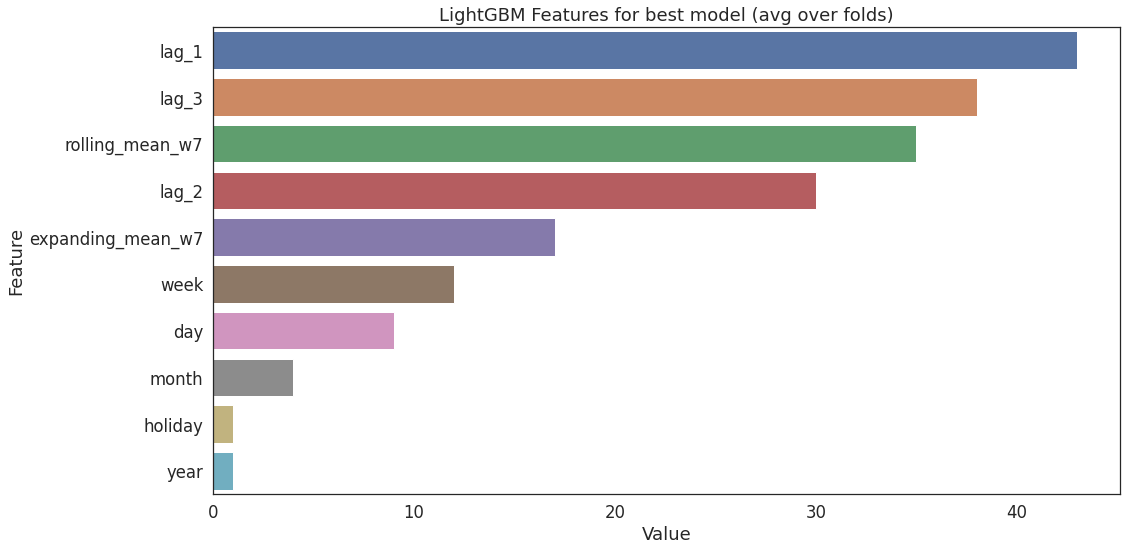

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(), X_train_t0_df.columns)), columns=['Value','Feature'])

plt.figure(figsize=(16, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for best model (avg over folds)', fontsize=18)
plt.tight_layout()
plt.show()

#CLUSTERING

Conducting Kolmogorov-Smirnov test statistic \\
According to the statistic, we fail to reject the null hypothesis that the underlying distributions of t0 and t2 are different

In [23]:
from scipy.stats import ks_2samp

ks_2samp(t0_df.y, t2_df.y)

Ks_2sampResult(statistic=0.19322109342270632, pvalue=3.219646771412954e-15)

In [24]:
f'{3.219646771412954e-15:.20f}'

'0.00000000000000321965'

In [25]:
!pip install kneed
# import matplotlib.pyplot as plt
from kneed import KneeLocator   
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [40]:
cluster_df = df.copy()

In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df.satis.to_numpy().reshape(-1, 1))

In [42]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

true_labels = lbl.fit_transform(cluster_df.magaza)

In [43]:
n_clusters = len(lbl.classes_)

In [44]:
kmeans = KMeans(
        init="random",
        n_clusters=n_clusters,
        n_init=10,
        max_iter=300,
        random_state=42
    )

In [45]:
y_kmeans = kmeans.fit_predict(scaled_features)


In [50]:
n_clusters

3

In [39]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


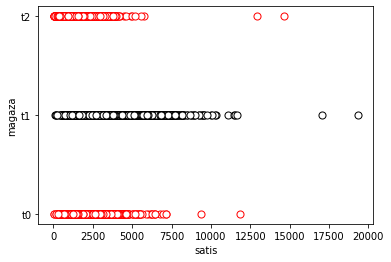

In [36]:
ax = cluster_df[cluster_df['magaza']=='t0'].plot.scatter(x='satis', y='magaza', s=50, color='white', edgecolor='red')

cluster_df[cluster_df['magaza']=='t1'].plot.scatter(x='satis', y='magaza', s=50, color='white', ax=ax, edgecolor='black')
cluster_df[cluster_df['magaza']=='t2'].plot.scatter(x='satis', y='magaza', s=50, color='white', ax=ax, edgecolor='red')

In [ ]:
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1] )
# scaled_features



array([[-0.96298921],
       [-1.37990272],
       [-1.17528594],
       ...,
       [-1.2553644 ],
       [-0.62392375],
       [-0.73247929]])

In [47]:
y_kmeans = kmeans.predict(scaled_features)
# df['label'] = kmeans.fit_predict(df[['mse']])

In [48]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 2.52680435],
       [-0.61924368],
       [ 0.58694447]])

In [ ]:
y_kmeans[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
print(silhouette_score(scaled_features, kmeans.labels_))


0.597535404107264


In [ ]:
# kmeans.labels_
true_labels

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
print(adjusted_rand_score(true_labels, kmeans.labels_))

0.1387111491206541


In [ ]:
def get_classification_report(y_test, y_pred):
    '''Source: https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5'''
    
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return df_classification_report

In [ ]:
get_classification_report(true_labels, kmeans.labels_)

,precision,recall,f1-score,support
0,0.098131,0.020979,0.034568,1001.000000
1,0.139058,0.249255,0.178521,1007.000000
2,0.148828,0.147177,0.147998,992.000000
accuracy,0.139333,0.139333,0.139333,0.139333
macro avg,0.128672,0.139137,0.120362,3000.000000
weighted avg,0.128633,0.139333,0.120396,3000.000000


What if we do unsupervised Clustering?

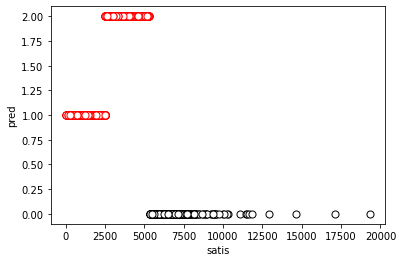

In [53]:
cluster_df['pred'] = kmeans.labels_
ax = cluster_df[cluster_df['pred']==0].plot.scatter(x='satis', y='pred', s=50, color='white', edgecolor='black')

cluster_df[cluster_df['pred']==1].plot.scatter(x='satis', y='pred', s=50, color='white', ax=ax, edgecolor='red')
cluster_df[cluster_df['pred']==2].plot.scatter(x='satis', y='pred', s=50, color='white', ax=ax, edgecolor='red')